<a href="https://colab.research.google.com/github/RodrigoMarenda/Analise_de_Dados/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Rodrigo Belo Marenda

**Matrícula:** 4052024002404

**Dataset:** [Wine Quality](https://www.kaggle.com/datasets/sahideseker/wine-quality-classification)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Classificação da Qualidade de Vinhos</p>

![**Classificação da Qualidade de Vinhos**](https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main//wine_image.jpeg?raw=true)


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">Introdução</p>




##Definição do Problema:

O conjunto de dados Wine Quality é um dataset multivariado que reúne avaliações de vinhos produzidos mundialmente. O principal objetivo é classificar a qualidade do vinho com base em 14 variáveis — entre características numéricas e categóricas — relacionadas à sua composição físico-química e sensorial.

## Premissas:

**Qualidade** pode ser explicada por atributos físico-químicos
Pressupõe-se que características como teor alcoólico, acidez, açúcar residual e densidade influenciam a qualidade do vinho, e que essas relações podem ser identificadas estatisticamente ou por meio de modelos preditivos.

**Preço e qualidade estão correlacionados**
Espera-se que vinhos com qualidade mais alta tenham, em média, preços mais elevados. Ou seja, o preço pode funcionar como um indicativo indireto de qualidade.

**Região e país impactam a qualidade**
A origem geográfica (país, província, região) pode refletir tradições enológicas ou práticas agrícolas que influenciam a qualidade do produto final.

**Distribuição das classes** é suficiente para análise supervisionada
Supõe-se que as classes low, medium e high possuem distribuição razoavelmente balanceada, viabilizando modelos de classificação sem necessidade de forte rebalanceamento.

## Hipóteses do Problema

- A Qualidade dos Vinhos podem ser distinguidas com base nas suas  Zona geograficas, ou seja caracteristicas como Pais e Região de produção ?

- Existe uma correlação entre Qualidade e o nivel alcolico ?

- A Qualidade do Vinho quando é Alta tende a ter um preço mais elevado ?

## Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características, o objetivo é definir a qual das três classes de qualidade (Baixa , Média ou Alta ) o vinho pertece.

**Variáveis:**

>Features (entradas):

>>id ,country, description, designation, points, price ,province, region_1, region_2, variety, winery, fixed_acidity, residual_sugar, alcohol, density,

>Target (saída):

>>quality_label (Baixa, Média ou Alta )

## Seleção dos Dados

O dataset de vinhos utilizado nesta análise é uma base pública amplamente conhecida, que reúne informações sobre avaliações de vinhos feitas por especialistas. Ele contém tanto atributos sensoriais (como pontuação e preço), quanto variáveis físico-químicas e categóricas (como país, variedade e vinícola).

Esta base exigiu uma etapa inicial de limpeza e preparação, incluindo o preenchimento de valores ausentes, tratamento de outliers e padronização de categorias. A seleção final dos dados considerou apenas os atributos relevantes para a análise de qualidade, descartando colunas redundantes ou com baixa relevância preditiva.

## Atributos do Dataset

O dataset Wine contém 25.000 amostras, divididas entre as 3 Qualidades de Vinhos possiveis.  


**country** - País onde o vinho foi produzido.

**description** - Texto descritivo sobre o vinho, geralmente com comentários sensoriais, aroma, sabor, etc.

**designation** - Nome específico ou designação da safra, linha ou rótulo do vinho.

**points** - Nota de qualidade atribuída ao vinho por avaliadores (normalmente em escala de 0 a 100).

**price** - Preço do vinho, geralmente na moeda do país de venda.

**province** - Região administrativa (como estado ou província) dentro do país onde o vinho foi produzido.

**region_1** - Região vitivinícola principal ou mais específica (exemplo: Napa Valley).

**region_2** - Sub-região ou região vitivinícola secundária, mais específica ainda.

**variety** - Tipo ou variedade da uva usada para produzir o vinho (ex: Cabernet Sauvignon, Merlot).

**winery** - Nome da vinícola ou produtor do vinho.

**fixed_acidity** - Quantidade de ácidos fixos no vinho (como ácido tartárico), que influenciam sabor e estabilidade.

**residual_sugar** - Quantidade de açúcar restante após a fermentação, influencia a doçura.

**alcohol** - Teor alcoólico do vinho em percentual (%).

**density** - Densidade do vinho, relacionada à composição química e concentração dos componentes.

**Quality_label** - Classificação do Rotulo do Vinho, podentdo ser Baixa , Média ou Alta Qualidade.   

******************************************

## **Estrutura do projeto:**
[**1. Importação das Bibliotecas**](#1)

>[**Step 01: Importação das Bibliotecas**](#1)

[**2. Carga dos Dados**](#1)

>[**Step 01: Carga de Dados**](#1)

[**3. Analise de Dados:**](#1)

>[**Step 01: Dimensões do Dataset**](#1)

>[**Step 02: Informações do DataSet**](#1)

>[**Step 03: Amostra de Dados**](#1)

>[**Step 04: Datatypes do DataSet**](#1)

>[**Step 05: Estatísticas Descritivas**](#1)

>[**Step 06: Distribuição de Classes**](#1)

[**4 - Visualizações**](#1)

>[**4.1. Visualizações Unimodais:**](#1)

>>[**Step 01: Histograma**](#1)

>>[**Step 02: Boxplot**](#1)

>>[**Step 03: Gráfico de Densidade**](#1)

>>[**Step 04: Histograma + KDE**](#1)

>[**4.2. Visualizações Multimodais:**](#1)

>>[**4.2.1. Visualizações Multimodais - Numérica × Numérica**](#1)

>>>[**Step 01: Scatter Plot**](#1)

>>>[**Step 02: Pairplot**](#1)

>>>[**Step 03: Heatmap de Correlação**](#1)

>>[**4.2.2. Visualizações Multimodais - Categórica × Numérica**](#1)

>>>[**Step 01: Boxplot por Categoria (quality_label)**](#1)

>>>[**Step 02: Violin Plot**](#1)

>>>[**Step 03: Barplot (média de preço por qualidade)**](#1)

>>>[**Step 04: Swarm Plot**](#1)

>>[**4.2.3. Visualizações Multimodais - Categórica × Categórica**](#1)

>>>[**Step 01: Countplot com hue**](#1)

>>>[**Step 02: Crosstab + Heatmap**](#1)

[**5. Pré Processamento de Dados:**](#1)

>[**5.1. Limpeza**](#1)

>>[**Step 01: Identificação de Nulos**](#1)

>>[**Step 02: Remoção de Linhas Nulas**](#1)

>>[**Step 03: Identificação de Nulos**](#1)

>>[**Step 04: Preenchermento de Valores**](#1)

>>[**Step 05: Identificação de Nulos**](#1)

>>[**Step 06: Atualização do DataSet Original**](#1)

>>[**Step 07: Redundancias**](#1)

>>[**Step 08: Outliers**](#1)

>[**5.2 Preparação e Transformação de dados**](#1)

>>[**Step 01: Novas Caracteristicas**](#1)

>>[**Step 02: Redução de Dimensionalidade**](#1)

>>[**Step 03: Categorização de Variáveis**](#1)

>>[**Step 04: Normalização**](#1)

>>[**Step 05 Visualização da distribuição após a normalização**](#1)

>>[**Step 06: Divisão do Conjunto de Dados**](#1)

[**6. Conclusão**](#1)

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">1. Importação das Bibliotecas</p>

Nessa etapa estamos importanto todas as blibliotecas que serão utilizadas nesse algoritimo

# Step 01: Importação das Bibliotecas



In [1]:
# Imports das Bibliotecas necessárias

import pandas as pd             #Biblioteca para manipulação e análise de dados.
import matplotlib.pyplot as plt #Biblioteca de histogramas e gráficos
import seaborn as sns           #Biblioteca de gráficos
import warnings                 #Biblioteca de avisos
import numpy as np              #Biblioteca de operações numéricas
import random                   #Biblioteca para gerar números aleatórios
import missingno as ms          #Biblioteca para visualizar graficamente os valores ausentes


from sklearn.datasets import load_wine                # Carrega o Dataset.
from sklearn.model_selection import train_test_split  # Separa os dados em conjuntos de treino e teste.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder #Biblioteca para Normalização e Padrozização
from sklearn.decomposition import PCA                 # Biblioteca para redução de dimensionalidade linear.
from sklearn.compose import ColumnTransformer         # Para fazer transformações a diferentes colunas
from sklearn.pipeline import Pipeline                 # Organiza o fluxo completo do pré-processamento e modelagem

# Configuração para não exibir os warnings
warnings.filterwarnings("ignore")

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">2. Carga dos Dados</p>


Nessa etapa estamos realizando a carga dos dados, que estão armazendos em um arquivo do tipo csv (Comma-Separated Values). Esse dataset foi obtido no Site Kaggle: https://www.kaggle.com/datasets. Foram coletados dados de rotulos de vinhos, com o objetivo de realização de uma classificação dos Rotulos de acordo com as variaveis dipostas no dataset.

# Step 01: Carga de Dados



In [4]:
#--------------------------------------------------------#
# Informa a URL de importação do dataset                 #
#--------------------------------------------------------#

url ="https://raw.githubusercontent.com/RodrigoMarenda/Analise_de_Dados/refs/heads/main/winemag-data_first25k_v4.csv"

# Lê o arquivo
df = pd.read_csv(url, delimiter=';', low_memory=False)



# Exibir as primeiras linhas do DataFrame
df.head()



,id,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,13964,Chile,"Kind of dull on the nose, with white pepper bu...",NaN,5.0,"28,4",NaN,NaN,NaN,NaN,NaN,"6,7","12,1","8,4","0,9946",low
1,14011,France,Marked by soft tannins yet surprisingly crisp ...,NaN,5.0,"28,2",NaN,NaN,NaN,NaN,NaN,"8,8","4,3","8,2","0,9967",low
2,14035,Argentina,"Giant and black, with extracted but pruney aro...",NaN,5.0,"28,1",NaN,NaN,NaN,NaN,NaN,"11,3","5,9","8,1","0,9923",low
3,14100,US,This bottling resembles the New Zealand paradi...,NaN,5.0,"28,6",NaN,NaN,NaN,NaN,NaN,"4,4","8,3","8,6","0,9911",low
4,14488,Spain,"A ripe and rich style, with black cherry, rais...",NaN,5.0,"28,1",NaN,NaN,NaN,NaN,NaN,"6,7","6,5","8,1","0,9947",low


In [8]:
# Conversão de colunas numéricas que estão como objeto
col_numericas = ['price','fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Substitui vírgula por ponto e converte para float
for col in col_numericas:
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# remove a coluna de controle ID , para que nao seja considerada como dado de negócio
if 'id' in df.columns:
    df = df.drop(columns='id')

#Mostra o resumo das informações estruturais do DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25099 entries, 0 to 25098
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          25001 non-null  float64
 4   price           25001 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.9+ MB
None


<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">3. Analise de Dados:</p>

Nessa etapa de Análise de Dados, também chamada de análise exploratória de dados ou Exploratory Data Analysis – EDA vamos entender, resumir e visualizar os dados antes da modelagem ou tomada de decisão.

# Step 01: Dimensões do Dataset

In [16]:
# Verifica o tamanho do dataset , total de linhas e colunas.
print("Informações do Dataframe:")

linhas, colunas = df.shape
print(f"Total de linhas: {linhas}")
print(f"Total de colunas: {colunas}")


Informações do Dataframe:
Total de linhas: 25099
Total de colunas: 15


# Step 02: Informações do DataSet

In [17]:
#informações resumidas sobre o Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25099 entries, 0 to 25098
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         24999 non-null  object 
 1   description     25001 non-null  object 
 2   designation     17179 non-null  object 
 3   points          25001 non-null  float64
 4   price           25001 non-null  float64
 5   province        24277 non-null  object 
 6   region_1        20509 non-null  object 
 7   region_2        9411 non-null   object 
 8   variety         24279 non-null  object 
 9   winery          24279 non-null  object 
 10  fixed_acidity   25001 non-null  float64
 11  residual_sugar  25001 non-null  float64
 12  alcohol         25001 non-null  float64
 13  density         25001 non-null  float64
 14  quality_label   25001 non-null  object 
dtypes: float64(6), object(9)
memory usage: 2.9+ MB
None


# Step 03: Amostra de Dados

In [18]:
# Amostragem das 10 primeiras linhas
print("="*50)
print("Amostra das 10 Primeiras linhas do DataFrame")
print("="*50)
df.head(10)




Amostra das 10 Primeiras linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,Chile,"Kind of dull on the nose, with white pepper bu...",NaN,5.0,28.4,NaN,NaN,NaN,NaN,NaN,6.7,12.1,8.4,0.9946,low
1,France,Marked by soft tannins yet surprisingly crisp ...,NaN,5.0,28.2,NaN,NaN,NaN,NaN,NaN,8.8,4.3,8.2,0.9967,low
2,Argentina,"Giant and black, with extracted but pruney aro...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,11.3,5.9,8.1,0.9923,low
3,US,This bottling resembles the New Zealand paradi...,NaN,5.0,28.6,NaN,NaN,NaN,NaN,NaN,4.4,8.3,8.6,0.9911,low
4,Spain,"A ripe and rich style, with black cherry, rais...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,6.7,6.5,8.1,0.9947,low
5,South Africa,"Fresh grass, vibrant citrus and tart gooseberr...",NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,5.3,6.3,8.1,10013.0000,low
6,US,Sometimes a reserve designation on a Chardonna...,NaN,5.0,28.9,NaN,NaN,NaN,NaN,NaN,9.4,4.7,8.9,0.9949,low
7,France,There's a strong mineral backbone to this wine...,NaN,5.0,28.7,NaN,NaN,NaN,NaN,NaN,9.9,13.6,8.7,0.9902,low
8,France,The fact that this wine comes from the chalkie...,NaN,5.0,28.1,NaN,NaN,NaN,NaN,NaN,7.1,7.5,8.1,0.9959,low
9,Spain,"Chunky and chocolaty on the nose, with aromas ...",NaN,5.0,28.5,NaN,NaN,NaN,NaN,NaN,14.3,1.0,8.5,0.9943,low


In [19]:
# Amostragem das 10 ultimas linhas
print("="*50)
print("Amostra das 10 ultimas linhas do DataFrame")
print("="*50)
df.tail(10)

Amostra das 10 ultimas linhas do DataFrame


,country,description,designation,points,price,province,region_1,region_2,variety,winery,fixed_acidity,residual_sugar,alcohol,density,quality_label
25089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conclusão:**

Observamos aqui a presença e linhas nulas

# Step 04: Datatypes do DataSet

In [20]:
# Verifica a estrutura do dataset, datatypes das colunas
print("="*40)
print("Informações sobre o DataFrame")
print("="*40)


print("\n Tipos de dados (dtypes) do dataset: \n")
print(df.dtypes)

Informações sobre o DataFrame

 Tipos de dados (dtypes) do dataset: 

country            object
description        object
designation        object
points            float64
price             float64
province           object
region_1           object
region_2           object
variety            object
winery             object
fixed_acidity     float64
residual_sugar    float64
alcohol           float64
density           float64
quality_label      object
dtype: object


# Step 05: Estatísticas Descritivas

In [21]:
print("="*40)
print("Resumo Estatístico")
print("="*40)
df.describe()

Resumo Estatistico


,points,price,fixed_acidity,residual_sugar,alcohol,density
count,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000,25001.000000
mean,65.099476,966.460618,10.174265,7.691948,11.040002,3095.600048
std,23.299921,794.509872,3.450971,4.206823,1.759477,4604.346069
min,5.000000,28.000000,4.000000,0.500000,8.000000,0.990000
25%,44.000000,209.370000,7.100000,4.100000,9.500000,0.993900
50%,47.000000,254.180000,10.400000,7.500000,11.000000,0.997400
75%,88.000000,1736.430000,13.100000,11.500000,12.600000,10008.000000
max,100.000000,2587.380000,16.000000,15.000000,14.000000,10049.000000


**Points**

A média de pontuação é 65, mas a mediana é 47, indicando uma distribuição assimétrica, puxada por pontuações altas.


**Price**

Média próxima de 966, mas  com mediana baixa 254 e valores extremos até 2587, o que revela forte assimetria e presença de outliers.


**Fixed Acidity**

Média de 10,17, com 50% dos valores entre 7,1 e 13,1. Variação e distribuição equilibrada.


**Residual Sugar**

Valores entre 0,5 e 15, com mediana de 7,5. Distribuição ampla.


**Alcohol**

Teor alcoólico distribuidos entre 9,5% e 12,6%. Distribuição equilibrada.


**Density**

A média está em 3095, mas o valor máximo chega a 10.049, pode apresebtar dados fora de escala. Grande probabilidade de existir outliers.



Resumo Estatistico


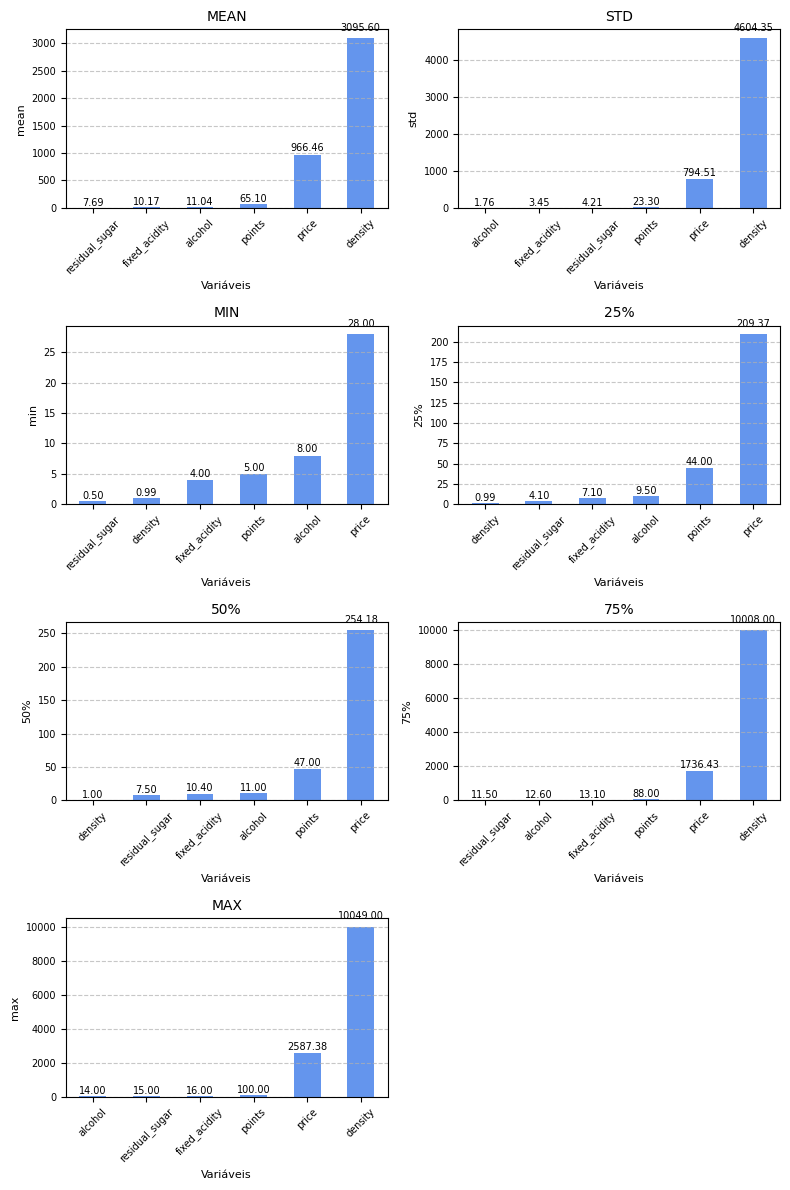

In [22]:
print("="*40)
print("Resumo Estatistico")
print("="*40)

stats = df.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estatisticas = stats.columns.tolist()

# Número de gráficos e layout (2 por linha)
num_graficos = len(estatisticas)
linhas = (num_graficos + 1) // 2  # arredonda pra cima
fig, axs = plt.subplots(linhas, 2, figsize=(8, linhas * 3))  # largura fixa, altura proporcional


axs = axs.flatten()  # facilitar iteração


for i, stat in enumerate(estatisticas):
    ax = axs[i]
    dados = stats[stat].sort_values()
    dados.plot(kind='bar', color='cornflowerblue', ax=ax)

    ax.set_title(stat.upper(), fontsize=10)
    ax.set_ylabel(stat, fontsize=8)
    ax.set_xlabel('Variáveis', fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

    # Adicionar números acima das barras
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + height*0.03,  # ligeiramente acima da barra
            s=f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=7,
            color='black'
        )

# Remover qualquer eixo vazio (se número ímpar)
if num_graficos % 2 != 0:
    fig.delaxes(axs[-1])


plt.tight_layout()
plt.show()


**Conclusão:**

O dataset é variado, com ampla gama de qualidades, preços e características químicas. A presença de outliers e assimetrias, em price e density , que exige atenção em análises futuras.

# Step 06: Média

Nesse step, vamos analisar a média (valor médio) das variáveis numéricas, para entender a tendência dos dados.

A média vai mostrar o valor típico de cada variável, o que facilita as interpretações.

Valores médios muito altos ou muito baixos mostram escalas distantes  entre as variáveis, isso afeta a aplicação dos modelos de machine learning.

Esse passo também tem como objetivo identificar possíveis distorções chamadas de outliers. A média vai evidenciar esses valores extremos.

In [23]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
points,65.099476
price,966.460618
fixed_acidity,10.174265
residual_sugar,7.691948
alcohol,11.040002
density,3095.600048


**Conclusão:**

A análise das médias demonstra que as variáveis possuem escalas diferentes, e variaveis como price e density vão precisar de tratamentos antes da modelagem.

# Step 07: Desvio Padrão

Nesse step, vamos calcular o desvio padrão das variáveis numéricas do dataset para entender a dispersão dos dados.

O desvio padrão ajuda a identificar variáveis com alta variabilidade, que podem impactar no desempenho do modelo. Variáveis com desvio padrão muito baixo podem não agregar informação relevante. Variáveis com desvio padrão muito alto podem conter outliers ou maior diversidade de valores.

In [24]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
points,23.299921
price,794.509872
fixed_acidity,3.450971
residual_sugar,4.206823
alcohol,1.759477
density,4604.346069


**Conclusão:**

A análise do desvio padrão reforça a necessidade de padronização ou normalização, principalmente nas variáveis com faixas de escalas distantes como density e price.

Já podemos concluir que vamos precisar eliminar Outliers e fazer um trabalho de Normalização e Padronização.

# Step 08: Distribuição de Classes


Nesse step vamos observar a contagens de amostras distribuidas pelas classes.

Distribuição de Classes


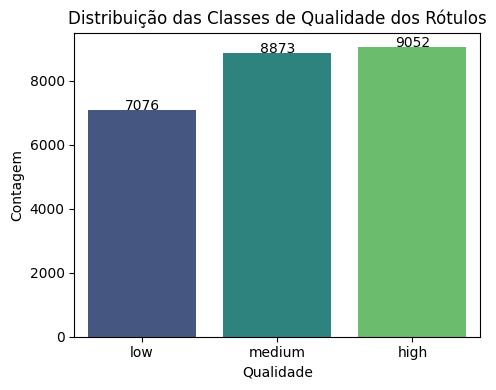

In [25]:
print("="*40)
print("Distribuição de Classes")
print("="*40)

# Agrupamento das classes
class_counts = df['quality_label'].value_counts().reindex(['low', 'medium', 'high'])

# Plot
plt.figure(figsize=(5, 4))

ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)

# Título e eixos
plt.title('Distribuição das Classes de Qualidade dos Rótulos')
plt.xlabel('Qualidade')
plt.ylabel('Contagem')

# Adiciona os valores nas barras
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**Conclusão:**

A distribuição é levemente balanceada, com um pouco de predominância das classes high e medium. A classe low tem uma quantidade menor de amostras, mas ainda representa uma fração significativa do total.

Essa proporção favorece a construção de modelos de classificação, pois não há um desbalanceamento severo entre as categorias.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">4. Visualizações:</p>


Nessa etapa vamos ver a distribuição dos dados por meio de Visualizações

> # 4.1. Visualizações Unimodais:


Nessa etapa vamos ver a distribuição dos dados por meio de Visualizações unimodais,  que são gráficos em que se observa uma única moda, uma única concentração central na distribuição dos valores.

>># Step 01: Histograma

Nesse step vamos observar por meio de histograma a distribuição de cada atributo do dataset.

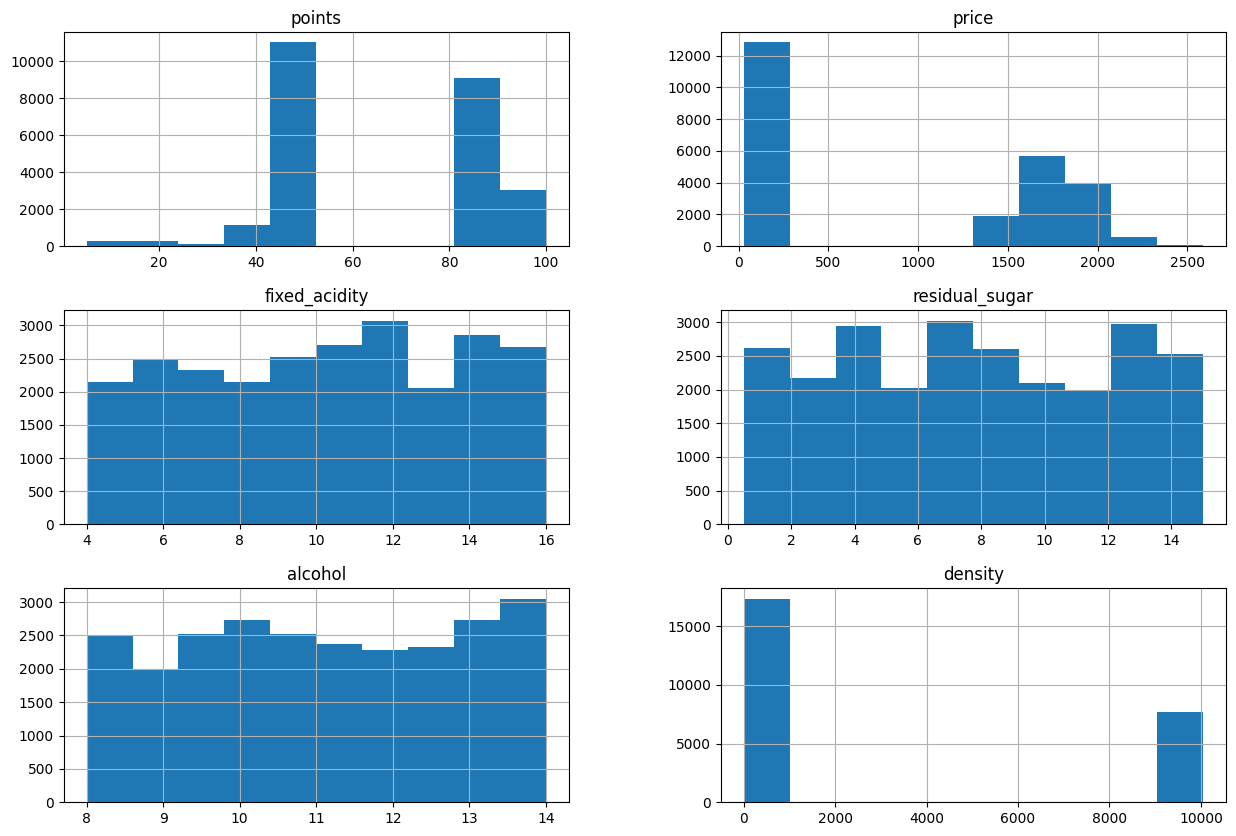

In [26]:
df.hist(figsize = (15,10))
plt.show()

**Conclusão:**

Os dados price e density precisam ser verificados e tratados, avaliaremos a remoção ou transformação de outliers.

Os dados points, alcohol, fixed_acidity e residual_sugar demostram estar equilibrados para análise.

>># Step 02: Boxplot

Nesse step vamos observar por meio de graficos Boxpot a distribuição de cada atributo do dataset.

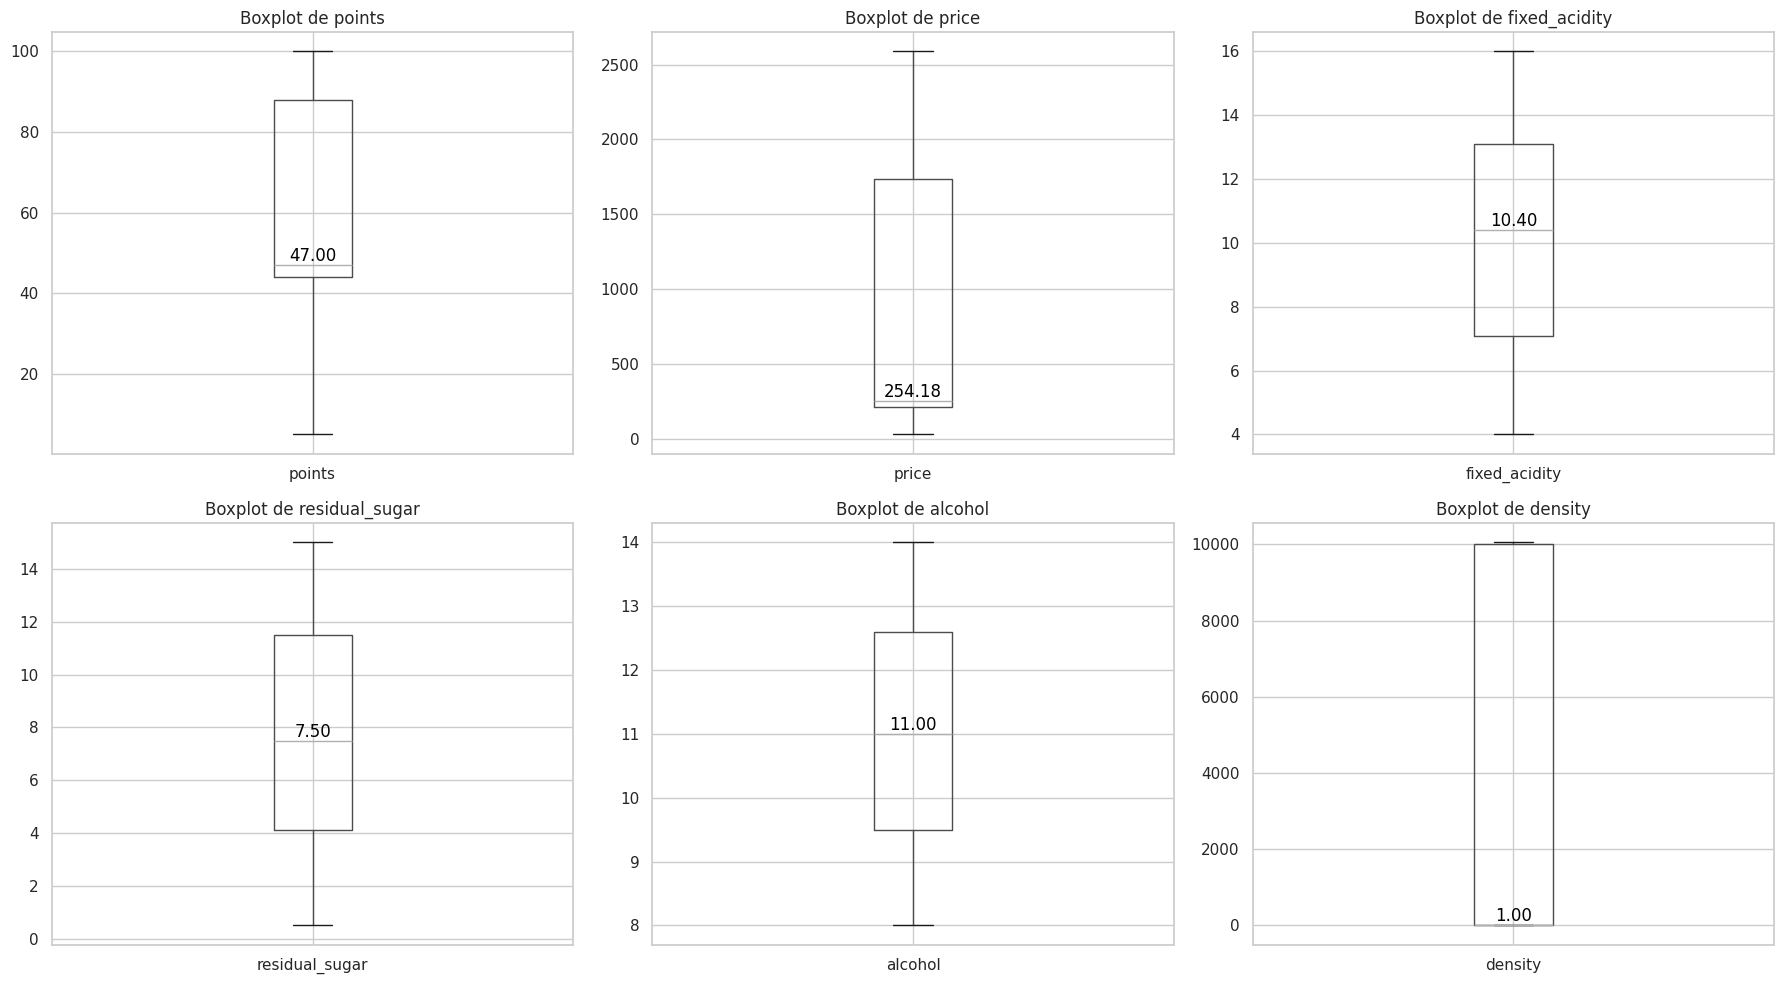

In [42]:
#lista as colunas numericas
col_numericas = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Cria a figura com subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

#loop por coluna numericas
for i, col in enumerate(col_numericas):
    df.boxplot(column=col, ax=axes[i])
    median_val = df[col].median()
    axes[i].text(1, median_val, f'{median_val:.2f}',
                 horizontalalignment='center', color='black', va='bottom')
    axes[i].set_title(f'Boxplot de {col}')

#exibe o grafico
plt.tight_layout()
plt.show()

**Conclusão:**

As variáveis price e density vão demandar tratamento de outliers e transformações.


points apresenta distribuição coerentes e poucos outliers, estão adequadas para análise.

alcohol, fixed_acidity e residual_sugar apresentam poucos outliers e boas medianas.

Já podemos observar que será necessario aplicar algumas tecnicas de preparação dos dados.

>Remoção ou imputação de outliers

>Normalização ou padronização

>Transformações

>># Step 03: Gráfico de Densidade

Nesse step vamos ver os gráficos de densidade, para ver a distribuição probabilística contínua de uma variável. Podemos verificar onde os dados estão mais concentrados e como se distribuem ao longo do eixo dos valores.

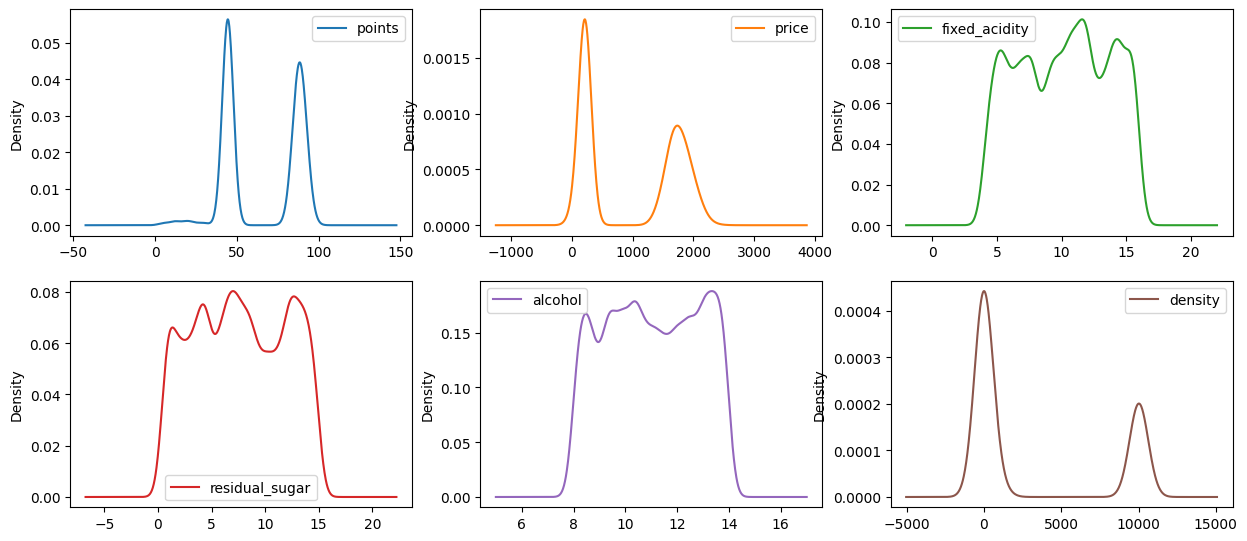

In [28]:
# monta grafico
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

**Conclusão:**

Distribuições assimétricas e multimodais estão presentes nesse dataset, o que indica a aplicação de técnicas como normalização, padronização e análise de outliers.

points, price e density se destacam por apresentarem padrões não normais e valores extremos, o que reforça a importância do pré-processamento para garantir resultados mais confiáveis em modelagens futuras.


**************************************

**points**

Apresentadois picos bem definidos, distribuição bimodal, o que pode indicar duas faixas principais de pontuação.


**price**

Também bimodal, com uma grande concentração de valores na faixa mais baixa (até 500) e um segundo pico na casa dos 1.800.

Reforça a presença de outliers, exigindo tratamento pré-modelagem.

**fixed_acidity, residual_sugar, alcohol**

Essas variáveis têm distribuição quase uniforme com vários picos o que define , multimodalidade.

**density**

Exibe dois picos bem separados, com um grupo grande próximo a 0 e outro em torno de 10.000, temos valores extremos ou problemas de escala.


>># Step 04: Histograma + KDE

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuem e onde se concentram. Esse tipo de grafico é ideal para detectar padrões, avaliar necessidade de transformações e decidir se vale a pena segmentar os dados.

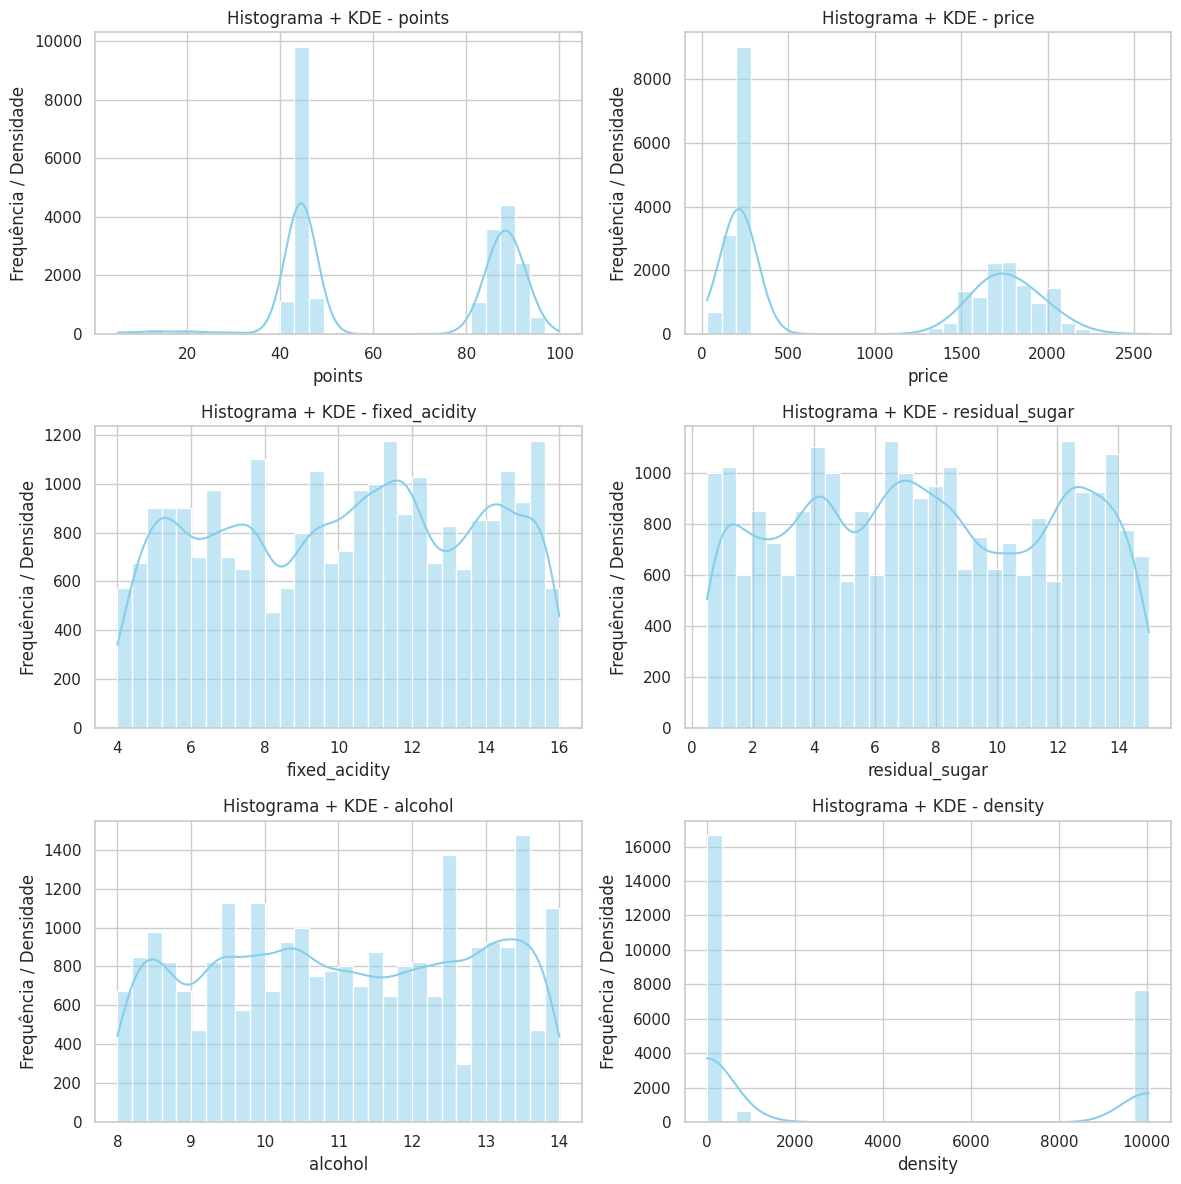

In [9]:
sns.set(style="whitegrid")

# Seleciona colunas numéricas
col_numericas = df.select_dtypes(include=['number']).columns

# Configura o layout do grid
n_cols = 2  # dois por linha
n_rows = int(np.ceil(len(col_numericas) / n_cols))

# Cria a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# Loop para gerar cada histograma com KDE
for i, col in enumerate(col_numericas):
    data = df[col].dropna()
    sns.histplot(data, bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histograma + KDE - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência / Densidade')

# Remove subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Exibe grafico
plt.tight_layout()
plt.show()

**Conclusão:**

A análise das distribuições revelou que as variáveis numéricas do dataset apresentam padrões variados e não normalizados. Variáveis como points e price demonstram distribuições bimodais.


*************************************************************

**points**

Duas distribuições evidentes (bimodal), com picos em torno de 47 e 88 pontos. Existem dois grupos bem distintos de qualidade na avaliação dos vinhos.

**price**

Distribuição assimétrica e altamente concentrada em valores baixos, com uma cauda longa para a direita. Indica a presença de outliers de preço.

**fixed_acidity**

Distribuição com múltiplos picos suaves, variando entre 4 e 16.
Dispersão equilibrada.

**residual_sugar**

Distribuição relativamente uniforme, com pequenas oscilações entre os valores.

**alcohol**

Baixa variação entre 8% e 14%, com leve concentração entre 12% e 13%.


**density**

Dois picos muito distintos: um próximo a 0.99 e outro em torno de 10.000. Bimodalidade.


> # 4.2 Visualizações Multimodais:

Nessa etapa vamos trabalhar com graficos multimodais que mostram distribuições de dados com dois ou mais picos. Esses picos representam valores ou intervalos onde os dados são mais frequentes.

Vamos trabalhasr com a variaveis abaixo que apresentam picos múltiplo:

fixed_acidity, residual_sugar e alcohol


>> # 4.2.1. Visualizações Multimodais - Numérica × Numérica

> # Step 01:  Scatter Plot

Neste step, vamos utilizar o gráfico um dispersão scatter plot para analisar visualmente a relação entre duas variáveis numéricas do dataset. Com o objetivo de entender como as variáveis se relacionam entre si, identificar padrões e comportamentos que podem ser relevantes para análises futuras e para o treinamento de modelos preditivos.

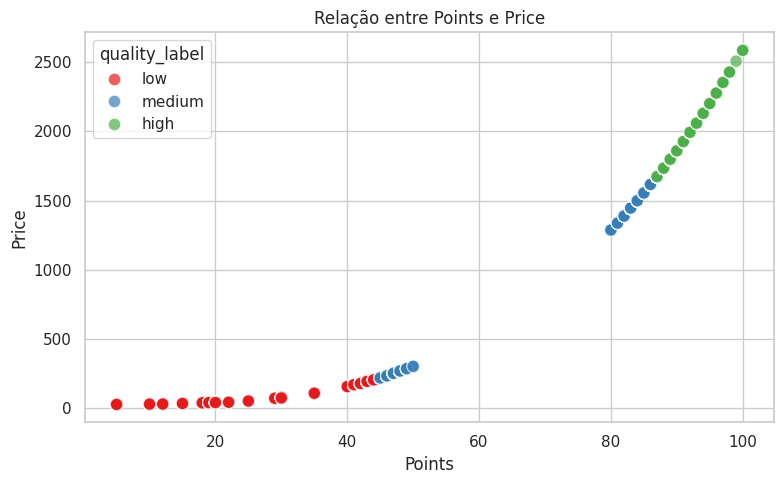

In [30]:
# Cria a figura
plt.figure(figsize=(8, 5))

#Monta o Grafico
sns.scatterplot(
    data=df,
    x='points',
    y='price',
    hue='quality_label',
    palette='Set1',
    s=80,
    alpha=0.7
)

# Titulo, Rotulos e Exibe o Grafico
plt.title('Relação entre Points e Price')
plt.xlabel('Points')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

**Conclusão:**

 As classes de qualidade estão bem definidas visualmente, o que indica que a variavel points está diretamente relacionada as categorias de qualidade (quality_label). Relação Clara entre Price e Points.


> # Step 02: Pairplot

Nesse Step vamos usar uma visualização que mostra gráficos de dispersão para todas as combinações possíveis entre variáveis numéricas de um dataset.
Também exibe, na diagonal, a distribuição de cada variável em forma de histograma ou KDE.



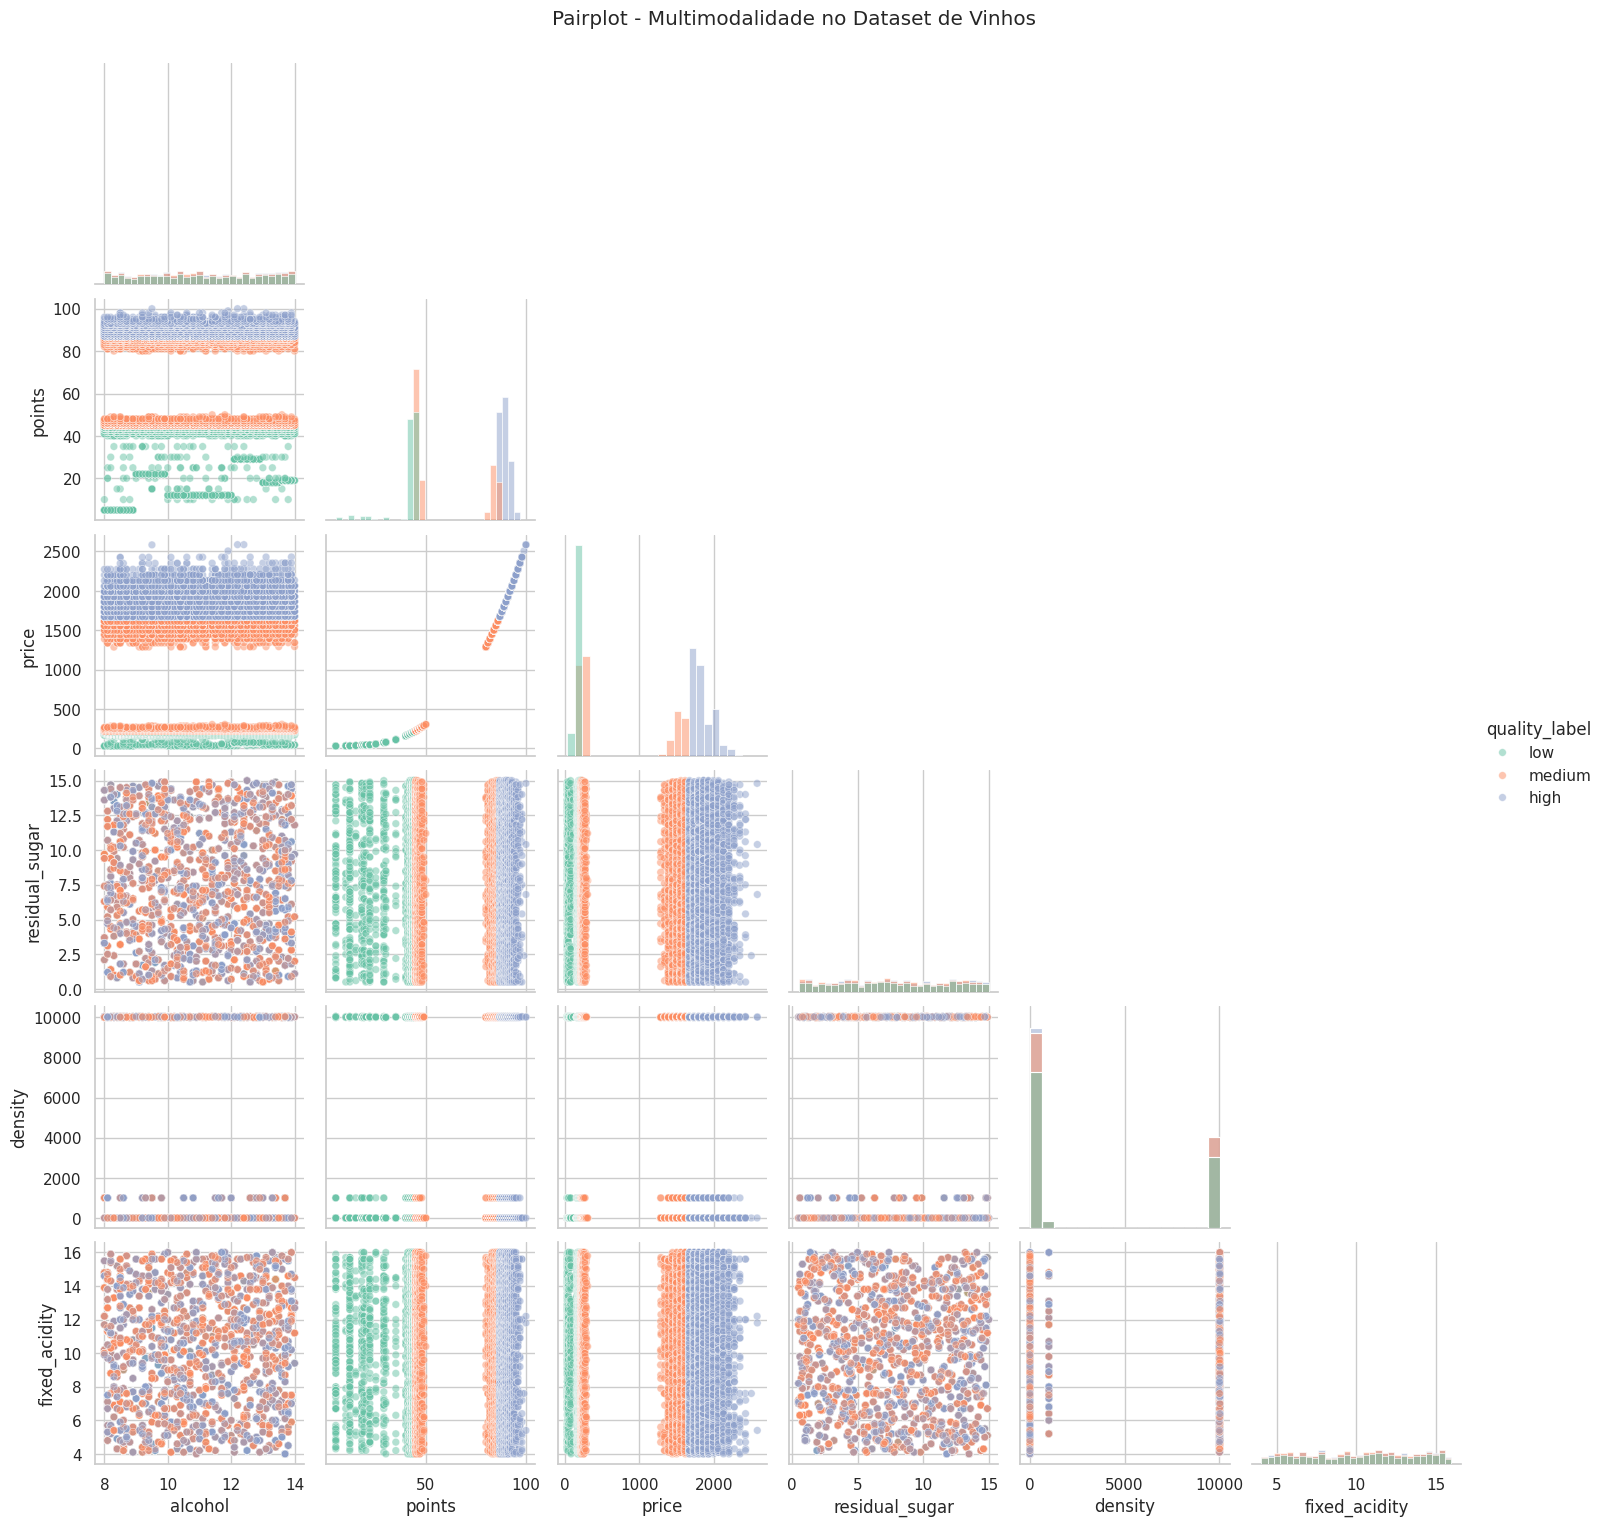

In [31]:
# Selecionar variáveis mais relevantes + variável categórica
cols = ['alcohol', 'points', 'price','residual_sugar','density','fixed_acidity']
sample_df = df[cols + ['quality_label']]

# Monta o Grafico
sns.pairplot(
    sample_df,
    hue='quality_label',
    diag_kind='hist',  # mais leve que 'kde'
    palette='Set2',
    corner=True,
    plot_kws={'alpha': 0.5, 's': 30}  # pontos menores e mais leves
)

#Mostra Grafico
plt.suptitle('Pairplot - Multimodalidade no Dataset de Vinhos', y=1.02)
plt.show()

**Conclusão:**

Avisualização mostra bem a multimodalidade e a relação entre variáveis numéricas no dataset de vinhos, com as classes quality_label.

A variável points é a que melhor separa as classes low, medium e high, com faixas bem distintas.

O price cresce junto com points, especialmente para os vinhos de maior qualidade.

Variáveis como residual_sugar, density e fixed_acidity não separam bem as classes, as distribuições estão sobrepostas.

O gráfico também confirma a presença de multimodalidade nas distribuições, principalmente em points e price.

> # Step 03: Heatmap de Correlação

Nesse step , vamos usar uma visualização que mostra o nível de correlação entre variáveis numéricas. Cada célula do gráfico representa o valor da correlação (geralmente de -1 a 1) entre duas variáveis, com cores diferentes indicando a força e direção da relação.

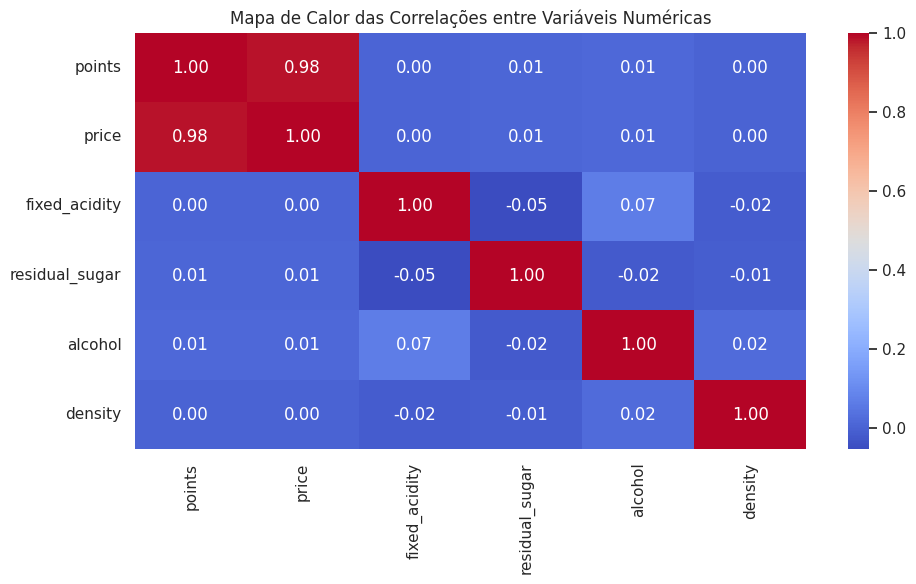

In [32]:
## Cria a figura
plt.figure(figsize=(10, 6))

# Monta o Grafico
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")

# Cria Titulo e Exibe o Grafico
plt.title('Mapa de Calor das Correlações entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

**Conclusão:**

Há uma forte correlação entre points e price (0.98), o que indica que  vinhos mais bem avaliados tendem a ser mais caros. As demais variáveis apresentam não apresentam uma correlação significativa. A relação do da pontuação na definição do preço esá bem evidente.

>> # 4.2.2. Visualizações Multimodais - Categórica × Numérica

> # Step 01: Boxplot por Categoria (quality_label)

Nesse step temos um grafico boxplot por categoria que mostra a distribuição de uma variável numérica.Estamos comparando a distribuição dessa variável para diferentes valores de categorias.

essa visualização tem como objetivo:

*   Comparar a dispersão e mediana da variável numérica entre as categorias.
*   Identificar diferenças, assimetrias, e possíveis outliers em cada grupo.
*   Facilitar a visualização para análises exploratórias.



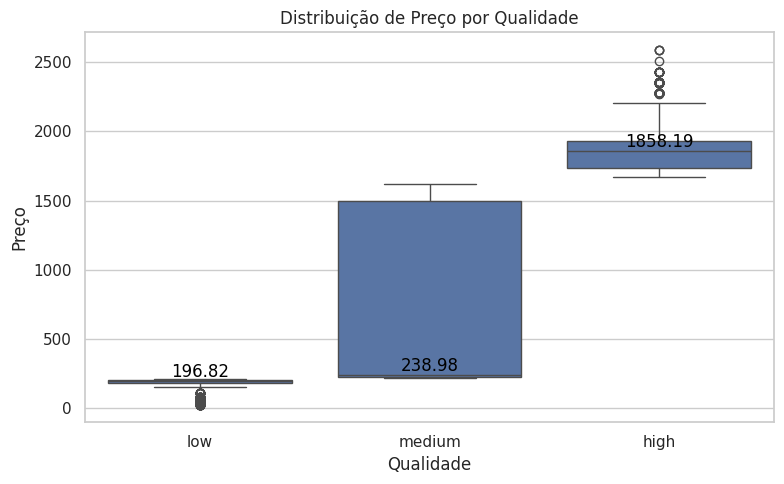

In [33]:
# Cria a figura
plt.figure(figsize=(8, 5))

# Monta o Grafico
ax = sns.boxplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'])

# Adiciona Titulos e Rotulos
plt.title('Distribuição de Preço por Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('Preço')

# Calcular e mostrar a mediana para cada categoria
for i, label in enumerate(['low', 'medium', 'high']):
    median_val = np.median(df.loc[df['quality_label'] == label, 'price'])
    ax.text(i, median_val, f'{median_val:.2f}', horizontalalignment='center', color='black',  va='bottom')

#Exibe o Grafico
plt.tight_layout()
plt.show()

**Conclusão:**

As medianas de preço mostram que vinhos de qualidade alta (high) têm preço significativamente maior (1.858) em relação às categorias medium (239) e low (197), que apresentam valores medianos próximos.

Além disso, o gráfico evidencia a presença de outliers, especialmente nas categorias medium e high, com vinhos de preços muito elevados que distorcem a média. Esses valores extremos indicam grande variação dentro de cada categoria e reforçam a necessidade de tratamento de outliers para análises e modelagens mais precisas.

> # Step 02: Violin Plot

Nesse step vamos usar uma visualização que combina o boxplot com um gráfico de densidade (KDE). Ideal para mostra a distribuição da variável numérica por categoria, a forma da distribuição e a mediana e quartis, como no boxplot. Tem como objetivo visualizar como os valores estão distribuídos dentro de cada categoria.

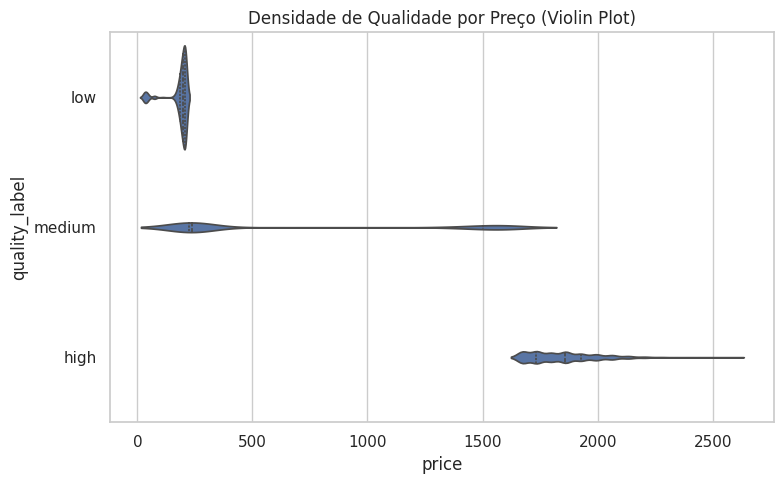

In [34]:
# Cria a figura
plt.figure(figsize=(8, 5))

# Monta Grafico
sns.violinplot(data=df, x='price', y='quality_label', order=['low', 'medium', 'high'], inner='quartile')

# Adiciona Titulo e Exibe o Grafico
plt.title('Densidade de Qualidade por Preço (Violin Plot)')
plt.tight_layout()
plt.show()

**Conclusão:**

O gráfico evidencia uma relação clara entre qualidade do vinho e faixa de preço, além de sugerir a presença de outliers, principalmente na categoria medium.

Esses outliers podem ser:

>Faixa de preço mais elástica: A categoria medium abrange uma ampla variação de preços, o que favorece a ocorrência de vinhos com valores muito acima da média.

>Baixa representatividade nas extremidades: Há poucas amostras com preços extremamente altos, o que faz com que esses registros destoem visualmente das demais e apareçam como valores isolados.

Já os vinhos da categoria high, apresentam distribuição de preço mais concentrada, tendo uma caracteristica de preço mais consistente dentro desse grupo.

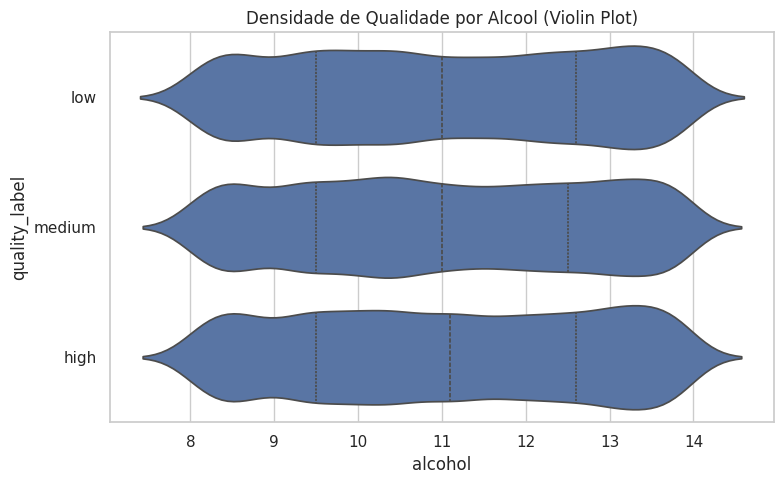

In [35]:
# Cria a figura com subplots
plt.figure(figsize=(8, 5))

# Monta o Grafico
sns.violinplot(data=df, x='alcohol', y='quality_label', order=['low', 'medium', 'high'], inner='quartile')

# Adiciona o Titulo e Exibe o Grafico
plt.title('Densidade de Qualidade por Alcool (Violin Plot)')
plt.tight_layout()
plt.show()

Nessa visualização os intervalos de álcool são parecidos entre as classes, o gráfico sugere uma tendência crescente de teor alcoólico conforme a qualidade aumenta.

Podemos observar também presença de outliers, e a distribuição bem preenchida nos três níveis de qualidade mostra que alcohol é uma variável contínua e bem representada no dataset.

> # Step 03: Barplot com agregações

Nesse step vamos usar  Barplot com agregações que mostra uma média de uma variável numérica para cada categoria.

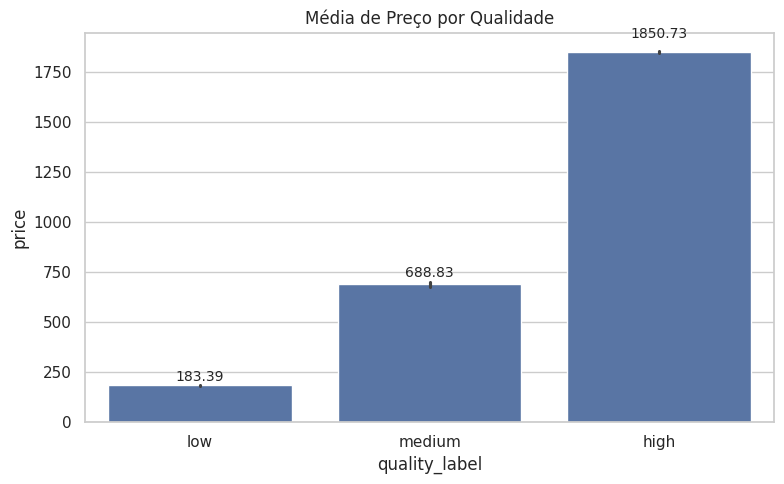

In [36]:
# Cria a figura
plt.figure(figsize=(8, 5))

# Monta o Grafico
ax = sns.barplot(data=df, x='quality_label', y='price', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Preço por Qualidade')

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + (height * 0.03),  # posição acima da barra
        s=f'{height:.2f}',  # casas decimais
        ha='center',
        va='bottom',
        fontsize=10
    )

#Exibe o Grafico
plt.tight_layout()
plt.show()

**Conclusão :**

Observa-se que os vinhos classificados como de qualidade alta (high) têm, em média, preços muito superiores às categorias medium e low, indicando uma forte correlação positiva entre qualidade e preço médio.

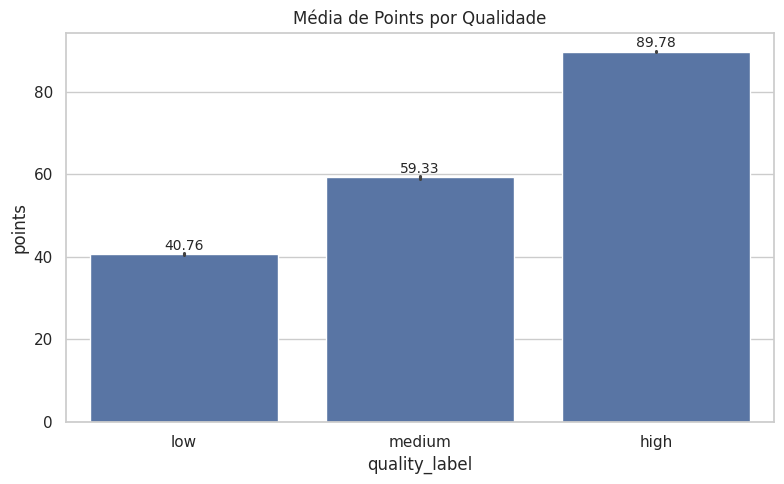

In [37]:
# Cria a figura com subplots
plt.figure(figsize=(8, 5))

# Monta o grafico
ax = sns.barplot(data=df, x='quality_label', y='points', order=['low', 'medium', 'high'], estimator='mean')
plt.title('Média de Points por Qualidade')

# Adicionar valores acima das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.3,  # posição acima da barra
        s=f'{height:.2f}',  # casas decimais
        ha='center',
        va='bottom',
        fontsize=10
    )

# Exibe Grafico
plt.tight_layout()
plt.show()

**Conclusão:**

A média de pontos aumenta conforme a categoria de qualidade, uma clara diferença na avaliação dos vinhos entre as categorias.

Esse grafico confirma que a classificação de qualidade está diretamente relacionada as pontuações, mostra uma coerência dos dados do dataset.

> # Step 04: Swarm Plot

Nesse step vamos usar um gráfico que mostra pontos individuais de dados numa dimensão categórica, onde cada ponto representa uma observação, e os pontos são posicionados de forma a não se sobrepor.

Inidcado para visualizar a distribuição real dos dados por categoria, identificando agrupamentos, outliers e multimodalidades.

**Foi usado uma amostra dos dados em função de performance**

**Recomendado não executar , pois o tempo de processamento é bem alto. O resultado do código foi anexado de forma estatica (imagem).**

In [ ]:

# Monta Grafico
#sns.swarmplot(
#    data=df.sample(n=5000, random_state=42),
#    x='quality_label',
#    y='price',
#    order=['low', 'medium', 'high'],
#    size=1.2,
#    alpha=0.5
#)

# Adiciona titulo e mostra grafico
#plt.title('Preço por Qualidade (Swarm Plot)')
#plt.tight_layout()
#plt.show()




![**Classificação da Qualidade de Vinhos**](https://github.com/RodrigoMarenda/Analise_de_Dados/blob/main//swarmv2.jpeg?raw=true)



**Conclusão :**

O gráfico confirma a hipótese de que vinhos de maior qualidade tendem a custar mais caro, com uma progressão visível de preços entre as categorias. Além disso, o padrão disperso reforça a necessidade de tratamento de outliers e padronização de faixas de preço antes da modelagem.

>> # 4.2.3. Visualizações Multimodais - Categórica × Categórica

> # Step 01: Countplot com hue

Nesse step vamos usar o Countplot, um gráfico de barras que mostra a contagem (frequência) de observações em cada categoria de uma variável categórica.

Quando usado com o parâmetro hue, o gráfico separa essas contagens por subcategorias de uma segunda variável, exibindo as barras agrupadas por cores distintas.

Tem como Obejtivo Visualizar a distribuição das categorias de uma variável principal e comparar as distribuições.

**Foi usado uma amostra dos dados em função de performance**

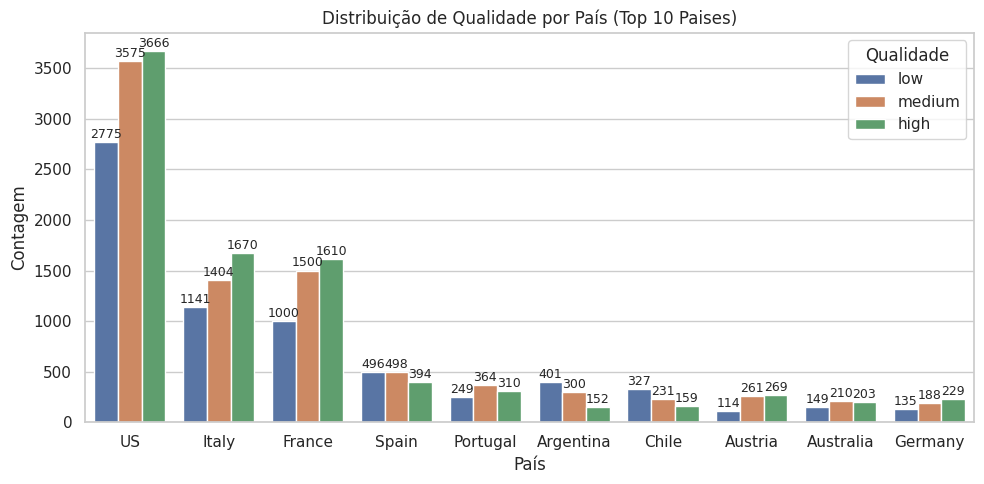

In [39]:
# Seleciona os 10 países com mais registros
top_paises = df['country'].value_counts().index[:10]

# Filtra todas as linhas do dataframe que pertencem aos 10 países mais frequentes
df_top = df[df['country'].isin(top_paises)]

# Cria a figura
plt.figure(figsize=(10, 5))

# Monta Grafico
ax = sns.countplot(data=df_top, x='country', hue='quality_label', order=top_paises,
                   hue_order=['low', 'medium', 'high'])


#Adiciona Titulo , Rotulos e legenda
plt.title('Distribuição de Qualidade por País (Top 10 Paises)')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.legend(title='Qualidade')

# Adicionar números em cima das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 10,  # Ajuste para ficar acima da barra
            s=f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Mostra Grafico
plt.tight_layout()
plt.show()

**Conclusão :**

O gráfico revela que a qualidade dos vinhos não está concentrada em apenas um país, embora EUA, Itália e França liderem em volume. A diversidade de categorias dentro de cada país sugere que a qualidade não depende exclusivamente da origem, mas também de outros fatores como variedade, técnica de produção e preço.

> # Step 02: Crosstab + Heatmap

Nesse step vamos usar uma visualização que mostra a frequência ou proporção entre as categorias. O heatmap utiliza uma tabela com cores, para facilitar a identificação de padrões.

Recomendado usar quando temos duas variáveis categóricas no dataset e queremos entender o relacionamento entre elas.

**Foi usado os top 10 paises por uma questão de performance e visualização**

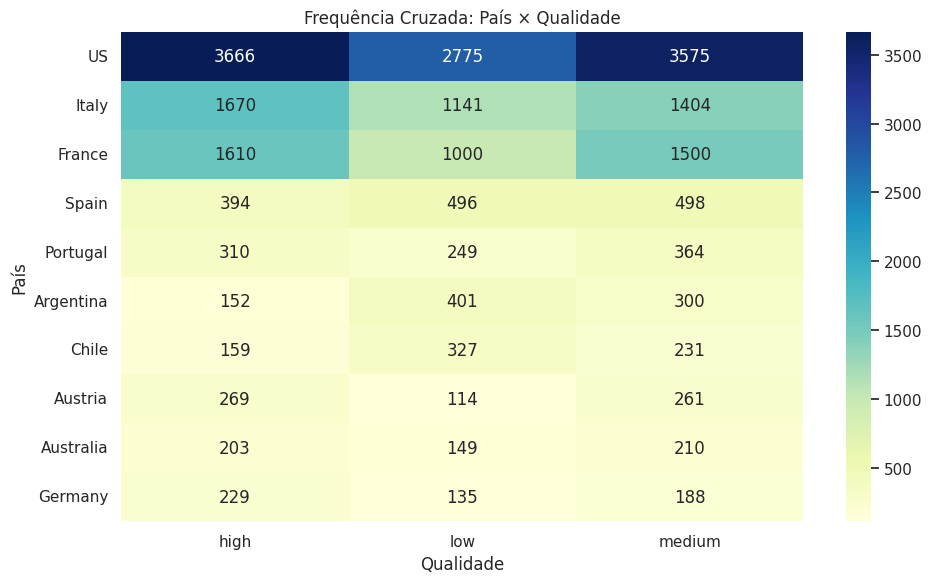

In [42]:
# Crosstab completa
crosstab = pd.crosstab(df['country'], df['quality_label'])

# Seleciona os 10 países com mais registros
top_paises = df['country'].value_counts().index[:10]

# Filtra a crosstab para esses países
top_crosstab = crosstab.loc[top_paises]

# Cria a figura
plt.figure(figsize=(10, 6))

# Monta Grafico
sns.heatmap(top_crosstab, annot=True, fmt='d', cmap='YlGnBu')

# Adiciona Titulo , Rotulos e Exibe o Grafico
plt.title('Frequência Cruzada: País × Qualidade')
plt.xlabel('Qualidade')
plt.ylabel('País')
plt.tight_layout()
plt.show()

**Conclusão :**

O heatmap reforça a percepção de que vinhos de alta qualidade estão presentes em diversos países, mas com forte predominância dos Estados Unidos, Itália e França. Isso pode estar ligado ao tamanho do mercado, capacidade de exportação e variedade de produção. Além disso, países com menos registros tendem a apresentar uma distribuição mais balanceada ou enviesada para categorias específicas, revelando perfis produtivos distintos.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">5. Pré Processamento de Dados:</p>

# 5.1 Limpeza

Nesta etapa, vamos fazer a limpeza dos dados para garantir a qualidade do dataset.

vamos Remover linhas e colunas com valores ausentes,Tratar valores nulos, Corrigir inconsistências e erros nos dados e identificar e tratar dados redundantes e outliers.

Com o objetivo de deixar o conjunto de dados limpo, consistente e pronto para análise e modelagem.

> # Step 01: Identificação de Nulos

Neste passo, vamos identificar os valores ausentes (nulos) em cada variável do dataset, após a remoção das linhas completamente vazias.
vamos analisar os maiores problemas de ausencia de dados no dataset, para que possamos decidir, no próximo passo, como tratar esses valores ausentes preenchimento, exclusão ou outra estratégia.

In [25]:
# Total e percentual de valores ausentes por coluna
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#monta o dataframe
missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)


#exibe o dataframe
print("="*50)
print("Total e Percentual de valores ausentes por coluna")
print("="*50)
print(missing_frame)

Total e Percentual de valores ausentes por coluna
                Missing Values  % do Total
country                      0         0.0
description                  0         0.0
designation                  0         0.0
points                       0         0.0
price                        0         0.0
province                     0         0.0
region_1                     0         0.0
region_2                     0         0.0
variety                      0         0.0
winery                       0         0.0
fixed_acidity                0         0.0
residual_sugar               0         0.0
alcohol                      0         0.0
density                      0         0.0
quality_label                0         0.0


<Axes: >

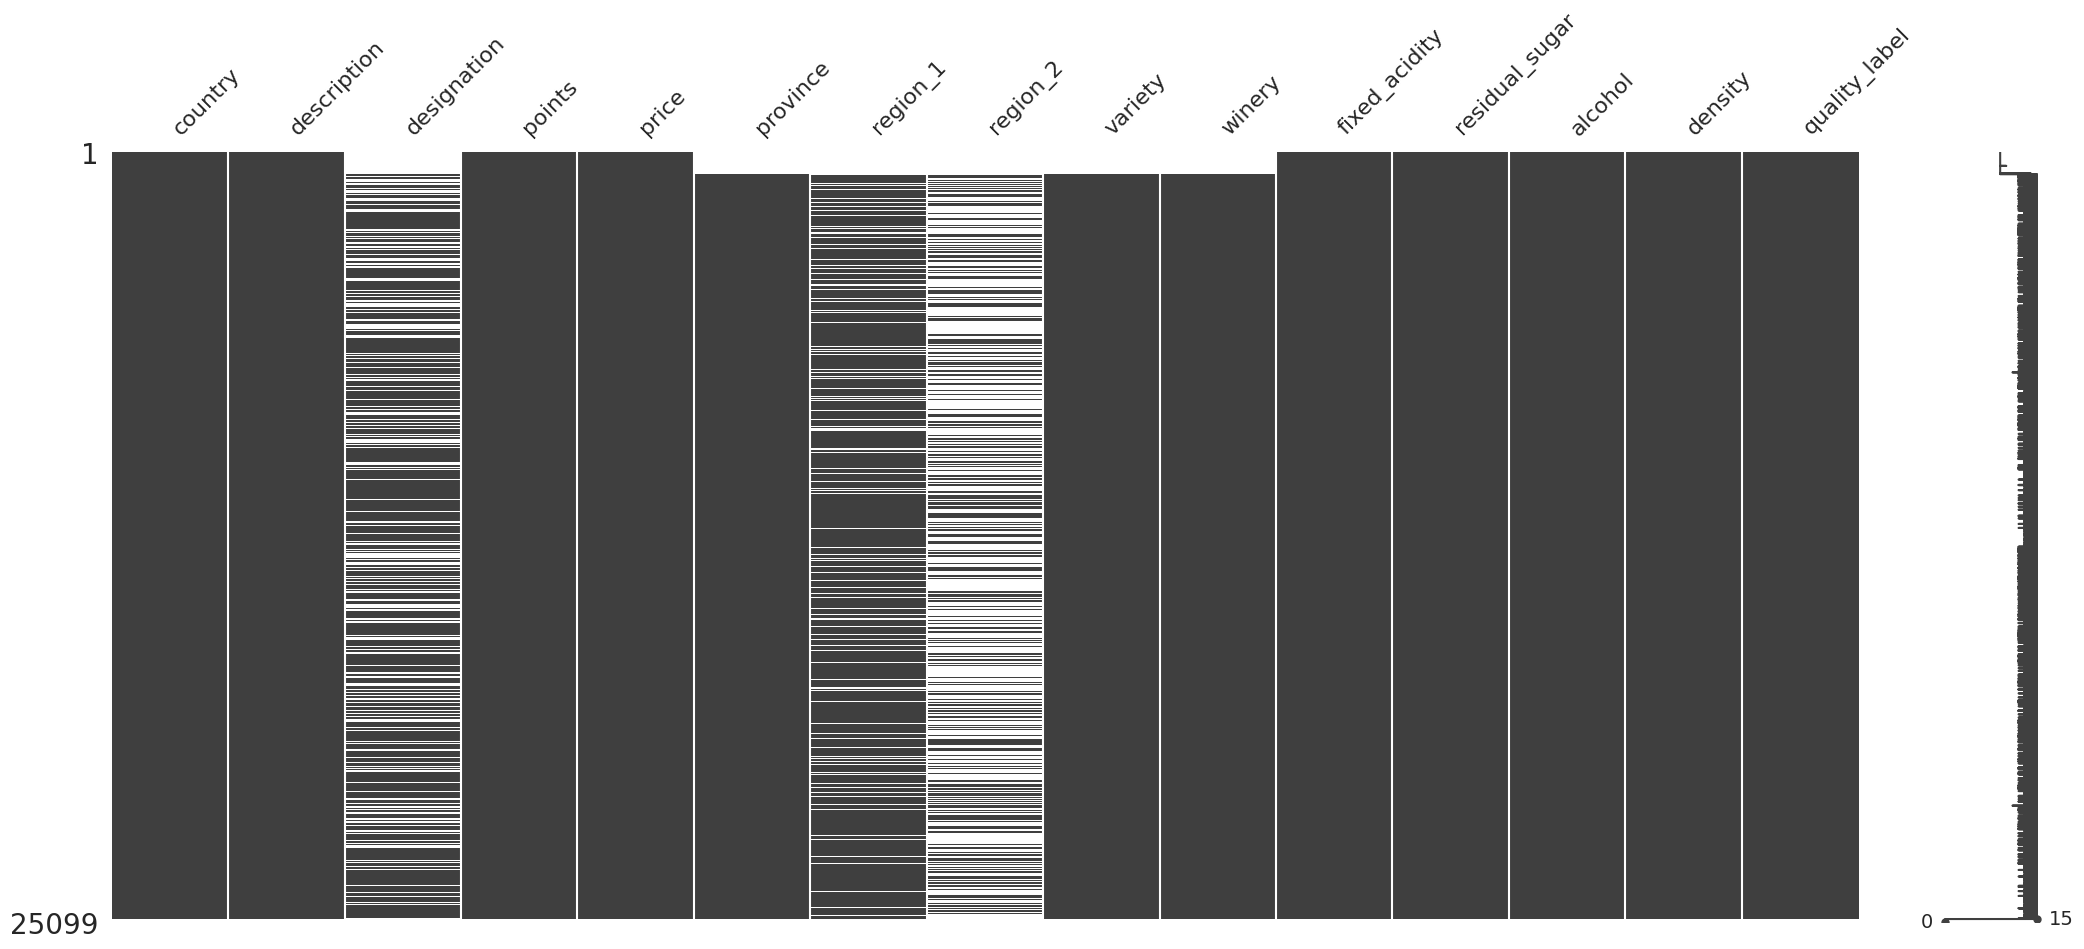

In [15]:
# recuperando os nomes das colunas
col = list(df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [45]:
print("="*40)
print("Resumo Estatistico")
print("="*40)

📊 Resumo Estatistico


> # Step 02: Remoção de Linhas Nulas

Neste passo, vamos remover do dataset todas as linhas que estão completamente vazias, ou seja, onde todas as colunas têm valores ausentes (nulos).

In [16]:
# Conta antes
linhas_antes = missing_df.shape[0]

# Remove linhas 100% vazias
missing_df.dropna(how='all', inplace=True)

# Conta depois
linhas_depois = missing_df.shape[0]

# Exibe o resultado
print(f"Linhas antes: {linhas_antes}")
print(f"Linhas depois: {linhas_depois}")
print(f"Linhas removidas: {linhas_antes - linhas_depois}")

Linhas antes: 25099
Linhas depois: 25001
Linhas removidas: 98


> # Step 03: Identificação de Nulos

Neste step, vamos identificar e quantificar os valores ausentes presentes em cada variável do dataset, após a remoção das linhas totalmente nulas realizada no passo anterior.

<Axes: >

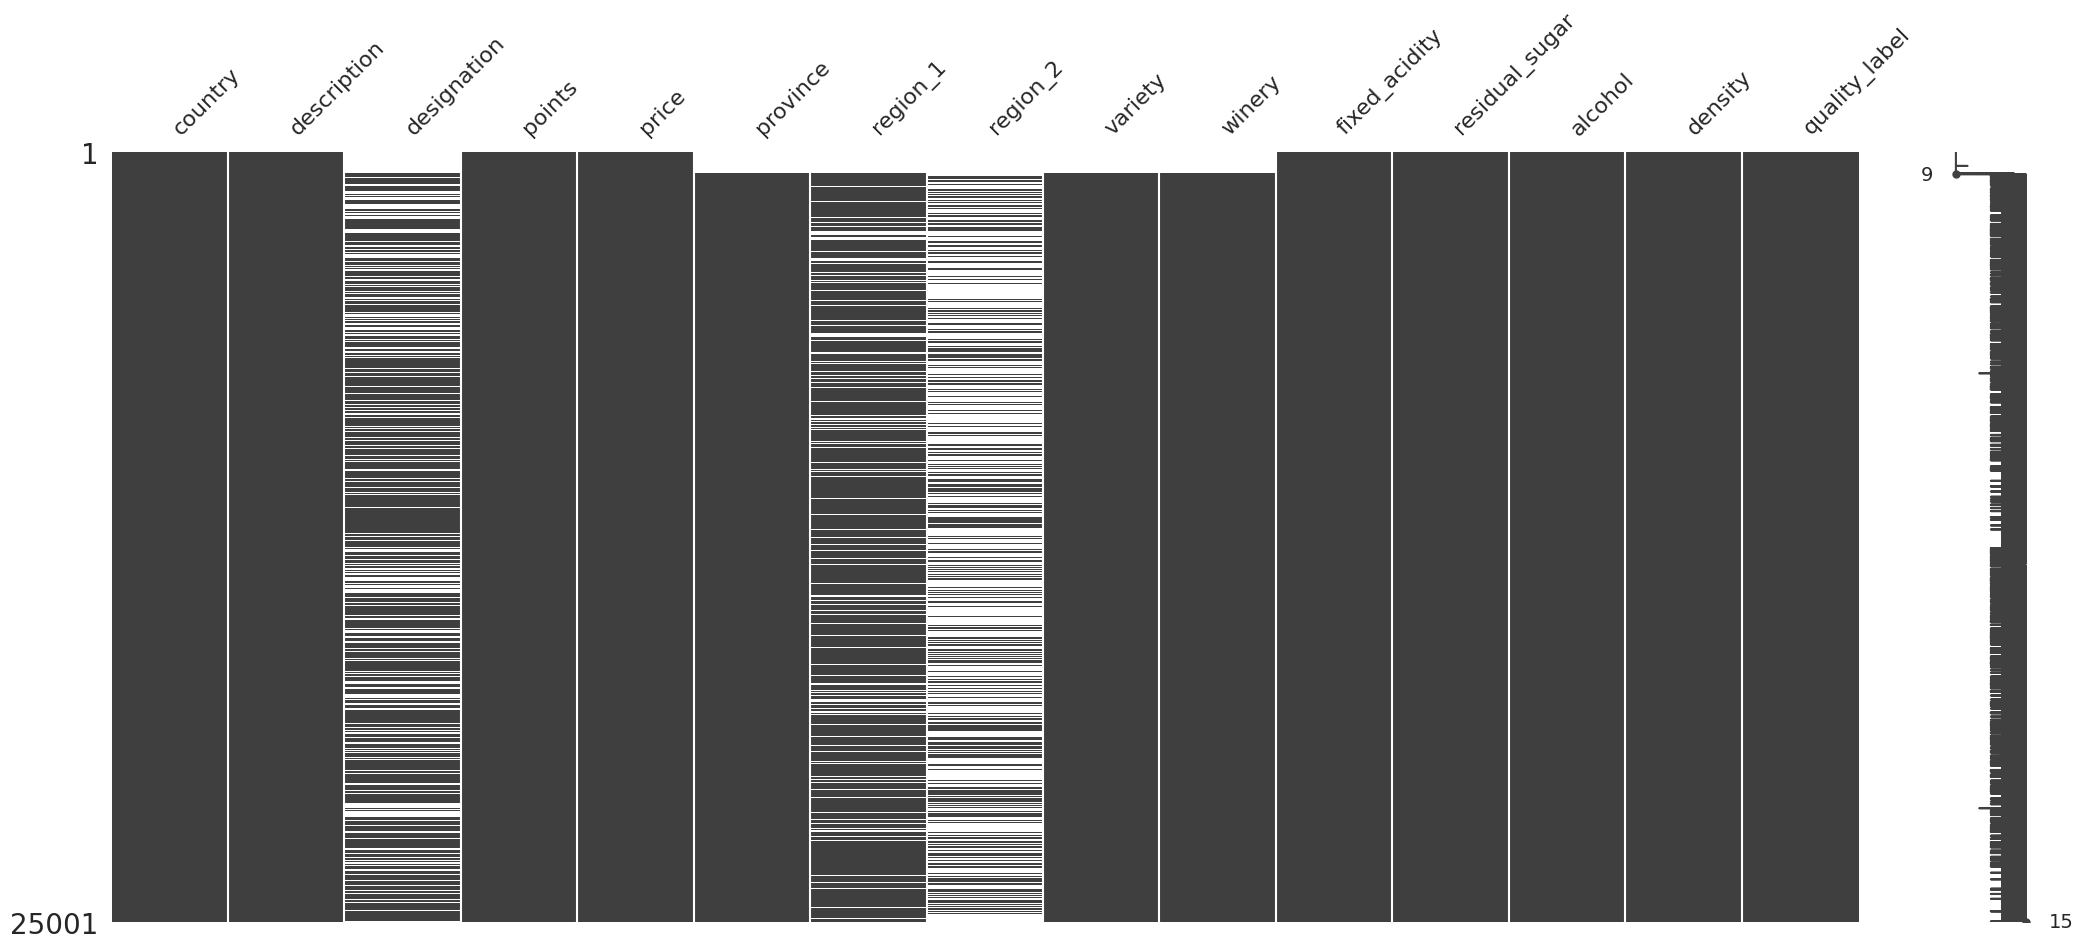

In [17]:
# recuperando os nomes das colunas
col = list(missing_df.columns)

# o novo dataset irá conter todas as colunas do dataset original
missing_df = missing_df[col[:]]

# substituindo os zeros por NaN
missing_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [26]:
# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#monta dataframe
missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)


#exibe o dataframe
print("="*50)
print("Total e Percentual de valores ausentes por coluna")
print("="*50)
print(missing_frame)

Total e Percentual de valores ausentes por coluna
                Missing Values  % do Total
country                      0         0.0
description                  0         0.0
designation                  0         0.0
points                       0         0.0
price                        0         0.0
province                     0         0.0
region_1                     0         0.0
region_2                     0         0.0
variety                      0         0.0
winery                       0         0.0
fixed_acidity                0         0.0
residual_sugar               0         0.0
alcohol                      0         0.0
density                      0         0.0
quality_label                0         0.0


> # Step 04: Preenchimento de Valores

Neste step, vamos tratar os valores ausentes (missing values) do  dataset. Com o objetivo de evitar problemas na criação dos modelos preditivos.

In [19]:
# Cria um dicionário para armazenar quantidades preenchidas
updated_cont = {}

# Categóricas
for col, fill_value in {
    'designation': 'Sem Designação',
    'country': 'Desconhecido',
    'province': 'Desconhecido',
    'region_1': 'Não Informada',
    'region_2': 'Não Informada',
    'variety': 'Outra',
    'winery': 'Desconhecida'
}.items():
    missing_antes = missing_df[col].isna().sum()
    missing_df[col] = missing_df[col].fillna(fill_value)
    updated_cont[col] = missing_antes  # quantos valores preenchidos

# Numéricas
# Para 'points'
missing_antes = missing_df['points'].isna().sum()
missing_df['points'] = missing_df['points'].fillna(missing_df['points'].median())
updated_cont['points'] = missing_antes

# Para 'price'
missing_antes = missing_df['price'].isna().sum()
missing_df['price'] = missing_df['price'].fillna(30)
updated_cont['price'] = missing_antes

# Exibir quantidades preenchidas
for col, count in updated_cont.items():
    print(f'Coluna "{col}": {count} valores preenchidos')

Coluna "designation": 0 valores preenchidos
Coluna "country": 0 valores preenchidos
Coluna "province": 0 valores preenchidos
Coluna "region_1": 0 valores preenchidos
Coluna "region_2": 0 valores preenchidos
Coluna "variety": 0 valores preenchidos
Coluna "winery": 0 valores preenchidos
Coluna "points": 0 valores preenchidos
Coluna "price": 0 valores preenchidos


> # Step 05: Identificação de Nulos

Nesse Step vamos verificar se ainda existem valores ausentes em alguma  variavel do dataset, após os tratamentos de nulos aplicados nos steps anteriores.

<Axes: >

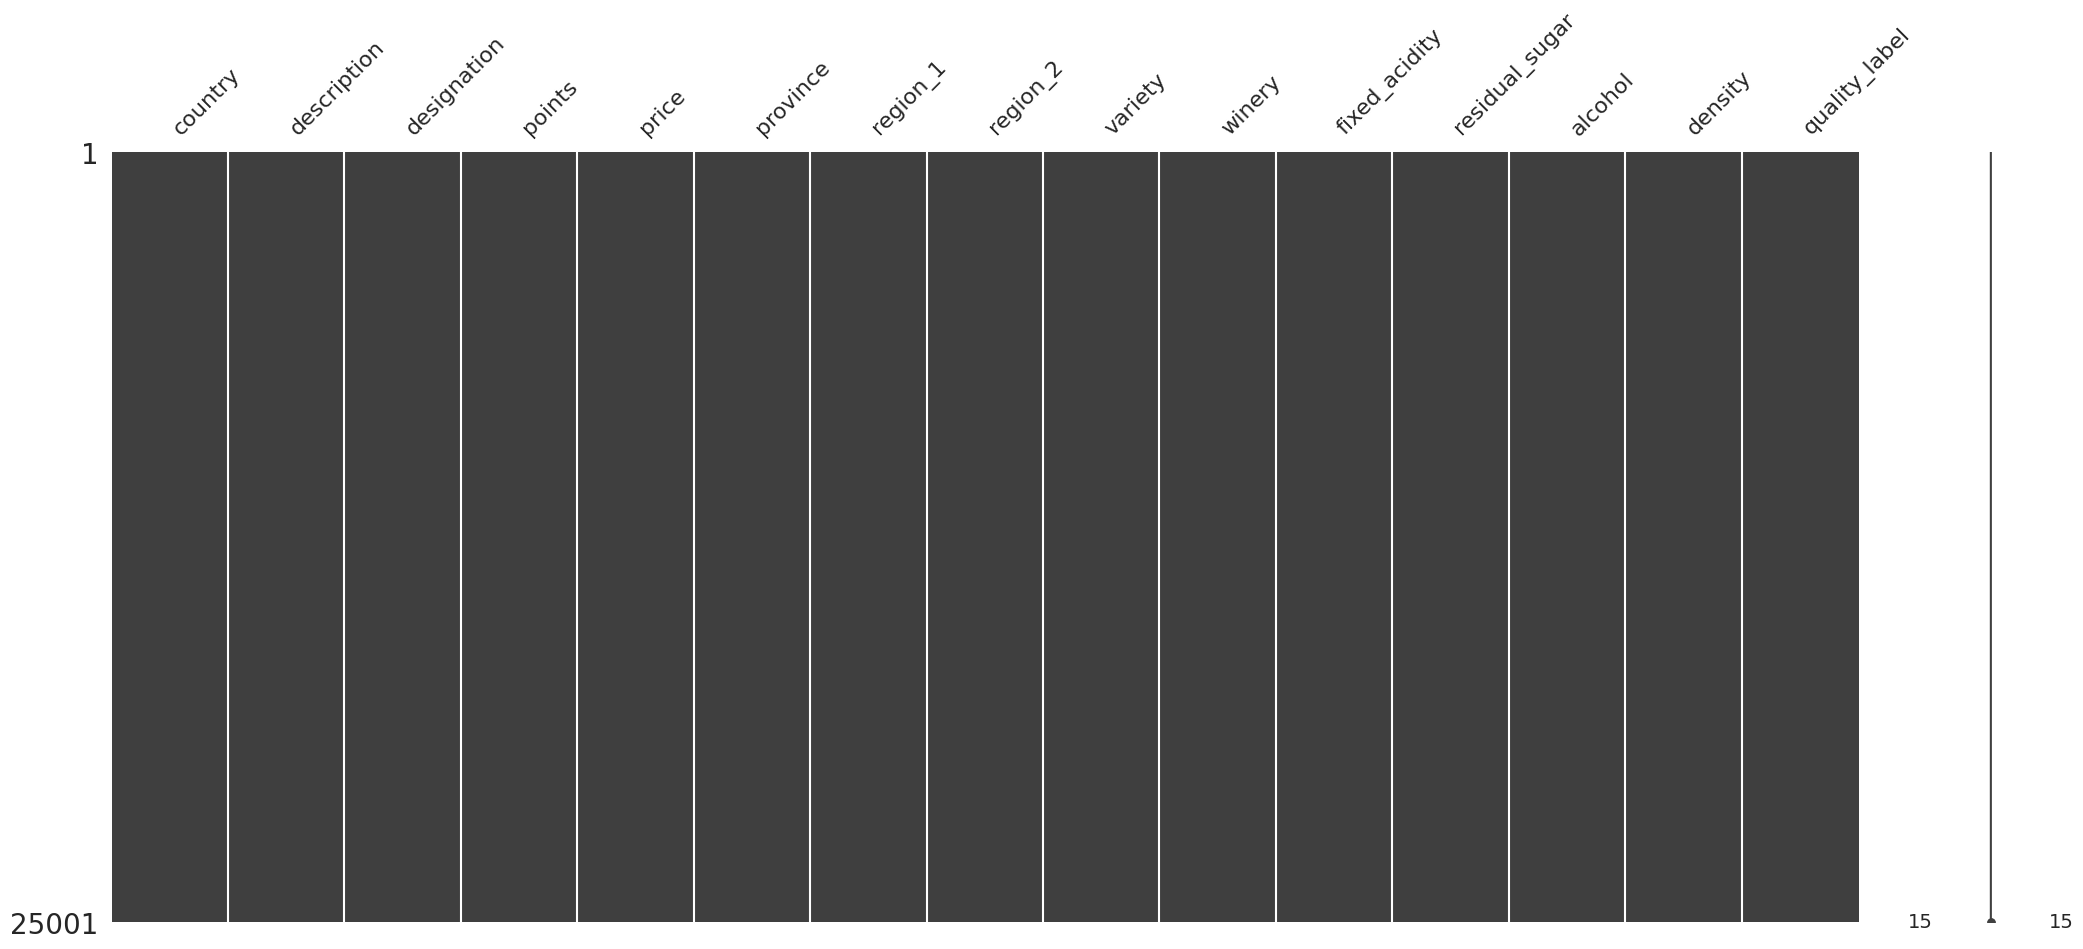

In [20]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(missing_df)

In [27]:

# Total e percentual de valores ausentes por coluna
missing = missing_df.isnull().sum()
missing_percent = (missing / len(df)) * 100

#monta o dataframe
missing_frame = pd.DataFrame({
    'Missing Values': missing,
    '% do Total': missing_percent
}).sort_values(by='Missing Values', ascending=False)

#exibe o dataframe
print("="*50)
print("Total e Percentual de valores ausentes por coluna")
print("="*50)
print(missing_frame)

Total e Percentual de valores ausentes por coluna
                Missing Values  % do Total
country                      0         0.0
description                  0         0.0
designation                  0         0.0
points                       0         0.0
price                        0         0.0
province                     0         0.0
region_1                     0         0.0
region_2                     0         0.0
variety                      0         0.0
winery                       0         0.0
fixed_acidity                0         0.0
residual_sugar               0         0.0
alcohol                      0         0.0
density                      0         0.0
quality_label                0         0.0


> # Step 06: Atualização do DataSet Original

Nesse passo estamos atribuindo as mudanças feitas no dataset missing_df para o dataset original df.


In [30]:
#copia o conteudo do dataframe missing_df para o dataframe orifinal df
df = missing_df.copy()

#exibe o dataframe
print("="*60)
print("DataFrame Original Atualizado após as Transformações")
print("="*60)


DataFrame Original Atualizado após as Transformações


> # Step 07: Redundancias

Neste passo, vamos identificar e tratar possíveis dados redundantes no dataset, informações duplicadas ou variáveis que trazem a mesma informação de formas diferentes. Com o objetivo de evitar vieses, reduzir complexidade e melhorar a performance dos modelos nas análises.


In [22]:
# Mostra as linhas duplicadas
print("Duplicatas encontradas:")
duplicatas = df[df.duplicated()]
print(f"Quantidade de linhas no DataFrame Original: {len(df)}")
print(f"Quantidade de linhas para remover duplicatas: {len(duplicatas)}")

# Remove duplicatas no próprio dataframe
df.drop_duplicates(inplace=True)

# Mostra quantas linhas sobraram depois da remoção
print(f"Quantidade de linhas após remover duplicatas: {len(df)}")


Duplicatas encontradas:
Quantidade de linhas no DataFrame Original: 25001
Quantidade de linhas para remover duplicatas: 0
Quantidade de linhas após remover duplicatas: 25001


> # Step 08: Outliers

Neste passo, vamos identificar e tratar os outliers do dataset, que são valores atípicos, extremos que distorcem as análises e modelos. Vamos ajustar o dataset para que os dados estejam consistentes e que os outliers não prejudiquem a qualidade das análises e predições.

In [23]:
# Lista de colunas numéricas para tratamento de outliers
col_numericas = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol','density']

# Inicializa uma máscara booleana (começa com todos True)
mask = pd.Series(True, index=df.index)

# Para cada coluna, aplica a regra do IQR
for col in col_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask &= df[col].between(lower, upper)

# Aplica a máscara: mantém apenas as linhas válidas
df_sem_outliers = df[mask]

# Guarda os outliers descartados
outliers_df = df[~mask]

# Exibe exemplos de outliers removidos
print("="*60)
print(f"Foram identificadas e removidas {len(outliers_df)} linhas de outliers.")
print("="*60)


#df = df_sem_outliers.copy()

Foram identificadas e removidas 0 linhas de outliers.


# 5.2 Preparação e Transformação de dados

> # Step 01: Novas Caracteristicas

Neste step, vamos criar novas variáveis partindo dos dados originais para melhorar o dataset e aumentar o poder preditivo dos modelos.
Com o objetivo de Aumentar a informação disponível para o modelo, provendo dados que não estavam explícitos nas variáveis originais.

In [43]:
# Novas características

def faixa_preco(preco):
    if preco == 0:
        return 'Sem Preço'
    elif preco > 0 and preco <= 100:
        return 'baixo'
    elif preco <= 500:
        return 'médio'
    else:
        return 'alto'

# preenche com valores as novas caracteristicas
df['price_range'] = df['price'].apply(faixa_preco)
df['qpr'] = df['points'] / df['price']
df['full_region'] = df['province'] + ' - ' + df['region_1']
df['alcohol_density_ratio'] = df['alcohol'] / df['density']


# Exibe msg
print("="*60)
print(f"Novas caracteristicas foram adicionada.")
print("="*60)

df.info()


Novas caracteristicas foram adicionada.
<class 'pandas.core.frame.DataFrame'>
Index: 25001 entries, 0 to 25000
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                25001 non-null  object 
 1   description            25001 non-null  object 
 2   designation            25001 non-null  object 
 3   points                 25001 non-null  float64
 4   price                  25001 non-null  float64
 5   province               25001 non-null  object 
 6   region_1               25001 non-null  object 
 7   region_2               25001 non-null  object 
 8   variety                25001 non-null  object 
 9   winery                 25001 non-null  object 
 10  fixed_acidity          25001 non-null  float64
 11  residual_sugar         25001 non-null  float64
 12  alcohol                25001 non-null  float64
 13  density                25001 non-null  float64
 14  quality_label      

> # Step 02: Redução de Dimensionalidade

Nesse step, vamos reduzir o número de variáveis, mantendo as informações mais relevantes para simplificar o modelo.
Com o obejetivo de diminuir a complexidade do modelo, facilitando a interpretação.

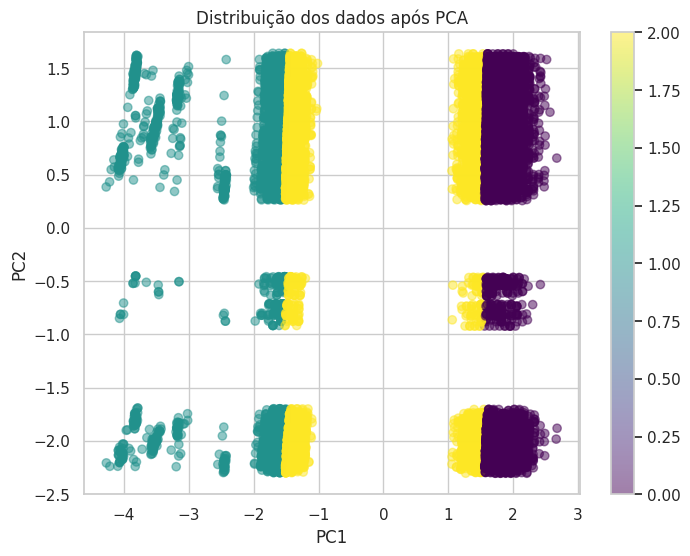

In [38]:
# Seleciona apenas colunas numéricas
col_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Selecionar apenas colunas numéricas válidas
X_numeric = df[col_numericas].copy()


# Normalizar os dados antes do PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Aplicar PCA para reduzir para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Substituir as features originais pelas componentes principais
X = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# monta figura e exibe o grafico
plt.figure(figsize=(8,6))
plt.scatter(X['PC1'], X['PC2'], c=pd.Categorical(df['quality_label']).codes, cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Distribuição dos dados após PCA')
plt.colorbar()
plt.show()

**Conclusão:**

xxxxxxxxxxxxx

> # Step 03: Categorização de Variáveis

Neste step, vamos fazer a transforção das variáveis categoricas para formatos apropriados ao modelo, convertendo elas em numeros e agrupando variáveis contínuas quando necessário. Com o Objetivo de garantir compatibilidade dos dados com os algoritmos e melhorar o desempenho dos modelos.

In [76]:
# Conversão de colunas categóricas em códigos numéricos para visualização ou modelagem
for col in ['country', 'designation', 'province', 'region_1', 'region_2',
            'variety', 'winery', 'price_range', 'quality_label', 'full_region']:
    df[f'{col}_code'] = LabelEncoder().fit_transform(df[col])

In [77]:
    df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,...,designation_code,province_code,region_1_code,region_2_code,variety_code,winery_code,price_range_code,quality_label_code,full_region_code,price_winsorized
0,Chile,"Kind of dull on the nose, with white pepper bu...",Sem Designação,5.0,28.4,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8585,73,508,11,259,2581,1,1,402,28.4
1,France,Marked by soft tannins yet surprisingly crisp ...,Sem Designação,5.0,28.2,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8585,73,508,11,259,2581,1,1,402,28.2
2,Argentina,"Giant and black, with extracted but pruney aro...",Sem Designação,5.0,28.1,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8585,73,508,11,259,2581,1,1,402,28.1
3,US,This bottling resembles the New Zealand paradi...,Sem Designação,5.0,28.6,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8585,73,508,11,259,2581,1,1,402,28.6
4,Spain,"A ripe and rich style, with black cherry, rais...",Sem Designação,5.0,28.1,Desconhecido,Não Informada,Não Informada,Outra,Desconhecida,...,8585,73,508,11,259,2581,1,1,402,28.1


# Step 04: Preparação dos Dados para Modelagem

Nesse step vamos definir as variáveis de entrada (features) e alvo (target) e separar os conjuntos de dados para treino e teste.

In [44]:
# Lista correta das colunas desejadas
col_numericas = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

#define features
X = df[col_numericas].copy()

# Define target
y = df['quality_label'].copy()

# Divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Exibe as dimensões
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (17500, 6)
Dimensões de X_test: (7501, 6)
Dimensões de y_train: (17500,)
Dimensões de y_test: (7501,)


> # Step 05: Normalização

Nesse step, vamos ajustar as variáveis para escalas comuns, evitando que diferenças de faixa de valores atrapalhem a análise.
Com o Obejtivo de colocar todas as variáveis em uma mesma escala para que tenham influência equilibrada no modelo.



In [40]:
# Lista correta das colunas desejadas
col_numericas = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Seleciona apenas essas colunas
X_train_selected = X_train[col_numericas].copy()
X_test_selected = X_test[col_numericas].copy()

# Inicializa o scaler
scaler = MinMaxScaler()

# Ajusta e transforma
scaler.fit(X_train_selected)
X_train_normalized = scaler.transform(X_train_selected)
X_test_normalized = scaler.transform(X_test_selected)

# Converte para DataFrame
X_train_normalized_df = pd.DataFrame(X_train_normalized, columns=col_numericas, index=X_train.index)
X_test_normalized_df = pd.DataFrame(X_test_normalized, columns=col_numericas, index=X_test.index)

# Exibe as primeiras linhas
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(X_train_normalized_df.head())



Primeiras 5 linhas dos dados normalizados (treino):
         points     price  ...   alcohol       density
19060  0.873684  0.666163  ...  0.150000  9.965167e-01
21031  0.421053  0.075931  ...  0.600000  2.687099e-07
8529   0.421053  0.074719  ...  0.083333  9.968153e-01
13158  0.821053  0.553677  ...  0.466667  5.274676e-07
10027  0.431579  0.082480  ...  0.950000  8.558909e-07

[5 rows x 6 columns]


> # Step 06: Visualização da distribuição após a normalização

Nesse Step vamos ver atraves do gráfico Histograma + KDE como os dados se distribuiram após a normalização.

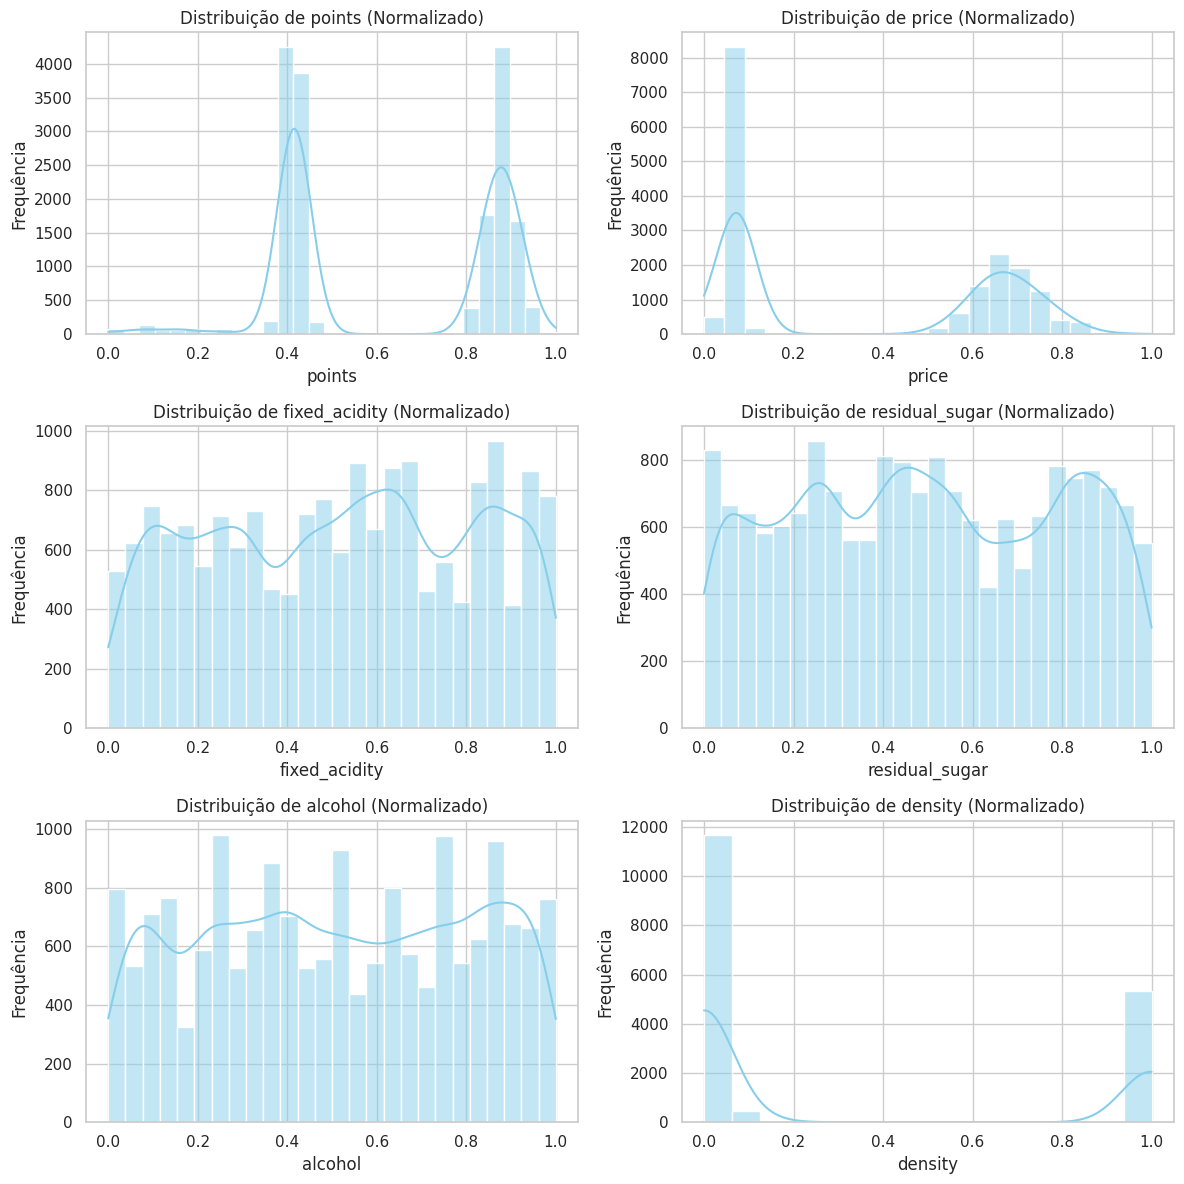

In [41]:
# Lista das colunas normalizadas
col_numericas = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Usa o DataFrame com dados normalizados (ex: X_train_normalized_df)
cols = col_numericas
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train_normalized_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Normalizado)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Conclusão:**

Após aplicar a normalização nas variáveis numéricas do dataset de vinhos, observamos:

📈 points continua apresentando dois picos distintos, mantendo seu padrão multimodal, o que indica grupos de pontuação bem definidos mesmo após a transformação.

💰 price mantém uma concentração inicial muito forte e uma cauda longa, indicando presença de valores extremos (outliers) que a normalização não elimina, apenas escala.

🍇 As variáveis fixed_acidity, residual_sugar e alcohol apresentaram uma distribuição mais uniforme e equilibrada ao longo da escala de 0 a 1, o que favorece modelos que assumem distribuições normalizadas.

⚖️ density ainda exibe uma distribuição bastante assimétrica, com duas grandes concentrações em extremos opostos, sugerindo a necessidade de tratamento adicional (como transformação logarítmica) antes da modelagem.

In [62]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover outliers
df_sem_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

# Ou substituir valores fora do limite
df['price_winsorized'] = df['price'].clip(lower=limite_inferior, upper=limite_superior)

In [63]:
print("Linhas no dataframe original:", len(df))
print("Linhas no dataframe sem outliers:", len(df_sem_outliers))

Linhas no dataframe original: 25001
Linhas no dataframe sem outliers: 25001


In [64]:
# Quantidade de valores que foram substituídos pelo limite inferior
substituidos_inferior = (df['price_winsorized'] == limite_inferior).sum()

# Quantidade de valores que foram substituídos pelo limite superior
substituidos_superior = (df['price_winsorized'] == limite_superior).sum()

print(f"Valores substituídos pelo limite inferior: {substituidos_inferior}")
print(f"Valores substituídos pelo limite superior: {substituidos_superior}")

Valores substituídos pelo limite inferior: 0
Valores substituídos pelo limite superior: 0


> # Step 07: Padronização

Nesse Step, vamos aplicar padronização nas variáveis numéricas selecionadas, paraque os dados tenham média 0 e desvio padrão 1. Essa transformação é importante para algoritmos de machine learning que assumem distribuição normal dos dados.

In [65]:
# Lista das colunas a padronizar
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Seleciona os dados numéricos originais (não normalizados)
X_train_selected = X_train[numeric_cols].copy()
X_test_selected = X_test[numeric_cols].copy()

# Inicializa o padronizador
scaler_std = StandardScaler()

# Ajusta no treino e transforma
scaler_std.fit(X_train_selected)

X_train_standardized = scaler_std.transform(X_train_selected)
X_test_standardized = scaler_std.transform(X_test_selected)

# Converte para DataFrame
X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=numeric_cols, index=X_train.index)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=numeric_cols, index=X_test.index)

# Exibe as primeiras linhas
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(X_train_standardized_df.head())


Primeiras 5 linhas dos dados padronizados (treino):
         points     price  fixed_acidity  residual_sugar   alcohol   density
19060  0.983177  0.966268       0.179860       -0.852272 -1.219952  1.505500
21031 -0.859529 -0.936054       0.556405        0.574625  0.318320 -0.670899
8529  -0.859529 -0.939958       1.048811       -0.138823 -1.447844  1.506152
13158  0.768909  0.603728       0.846056       -0.257732 -0.137465 -0.670899
10027 -0.816675 -0.914947      -1.065637       -0.471766  1.514754 -0.670898


> # Step 08: Visualização da distribuição após a padronização

Nesse Step, vamos visualizar a distribuição das variáveis numéricas após a padronização. O objetivo é verificar se os dados foram transformados corretamente. Média das distribuições proxima de 0 e desvio padrão está próximo de 1.

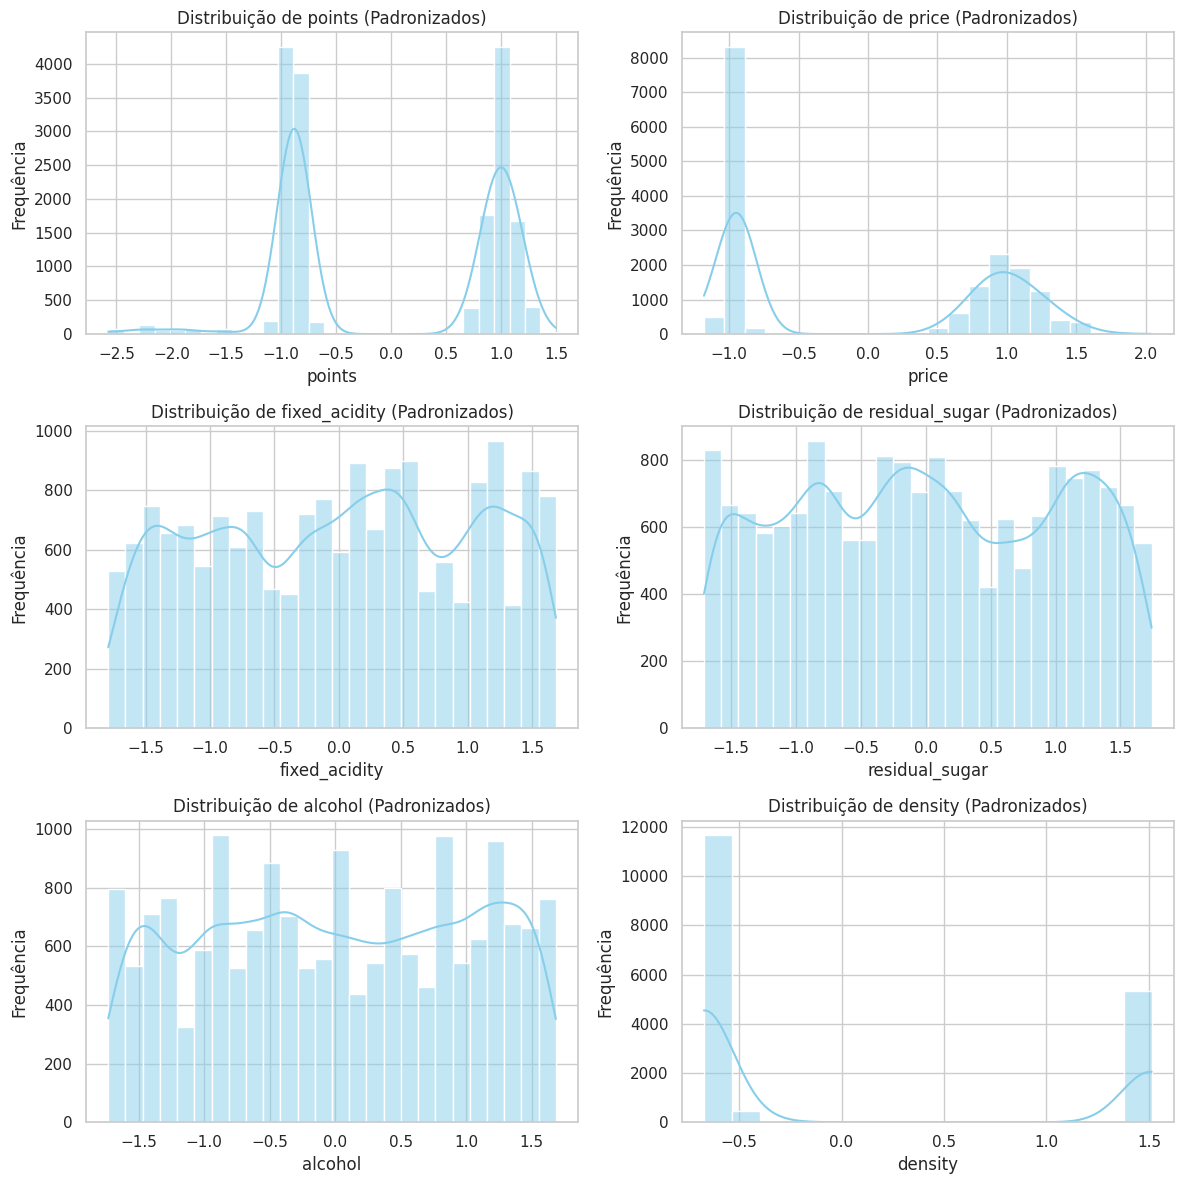

In [66]:
# Lista das colunas padronizadas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

# Usa o DataFrame com dados padronizados (ex: X_train_normalized_df)
cols = numeric_cols
n_cols = 2
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(X_train_standardized_df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col} (Padronizados)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras (caso sobre espaço no grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Conclusão:**

A padronização aplicada corretamente. Todas as variáveis têm escala compatível média ≈ 0, desvio padrão ≈ 1.

As diferenças de forma entre as variáveis são comums as características reais dos dados, não representam problemas de escalonamento.

> # Step 09: Comparativo após Normalização e Padronização

Nesse Step, vamos comparar visualmente os efeitos da normalização e da padronização sobre as variáveis numéricas selecionadas. O objetivo é entender como cada técnica altera a escala dos dados e avaliar qual abordagem pode ser mais adequada para os modelos a serem aplicados.

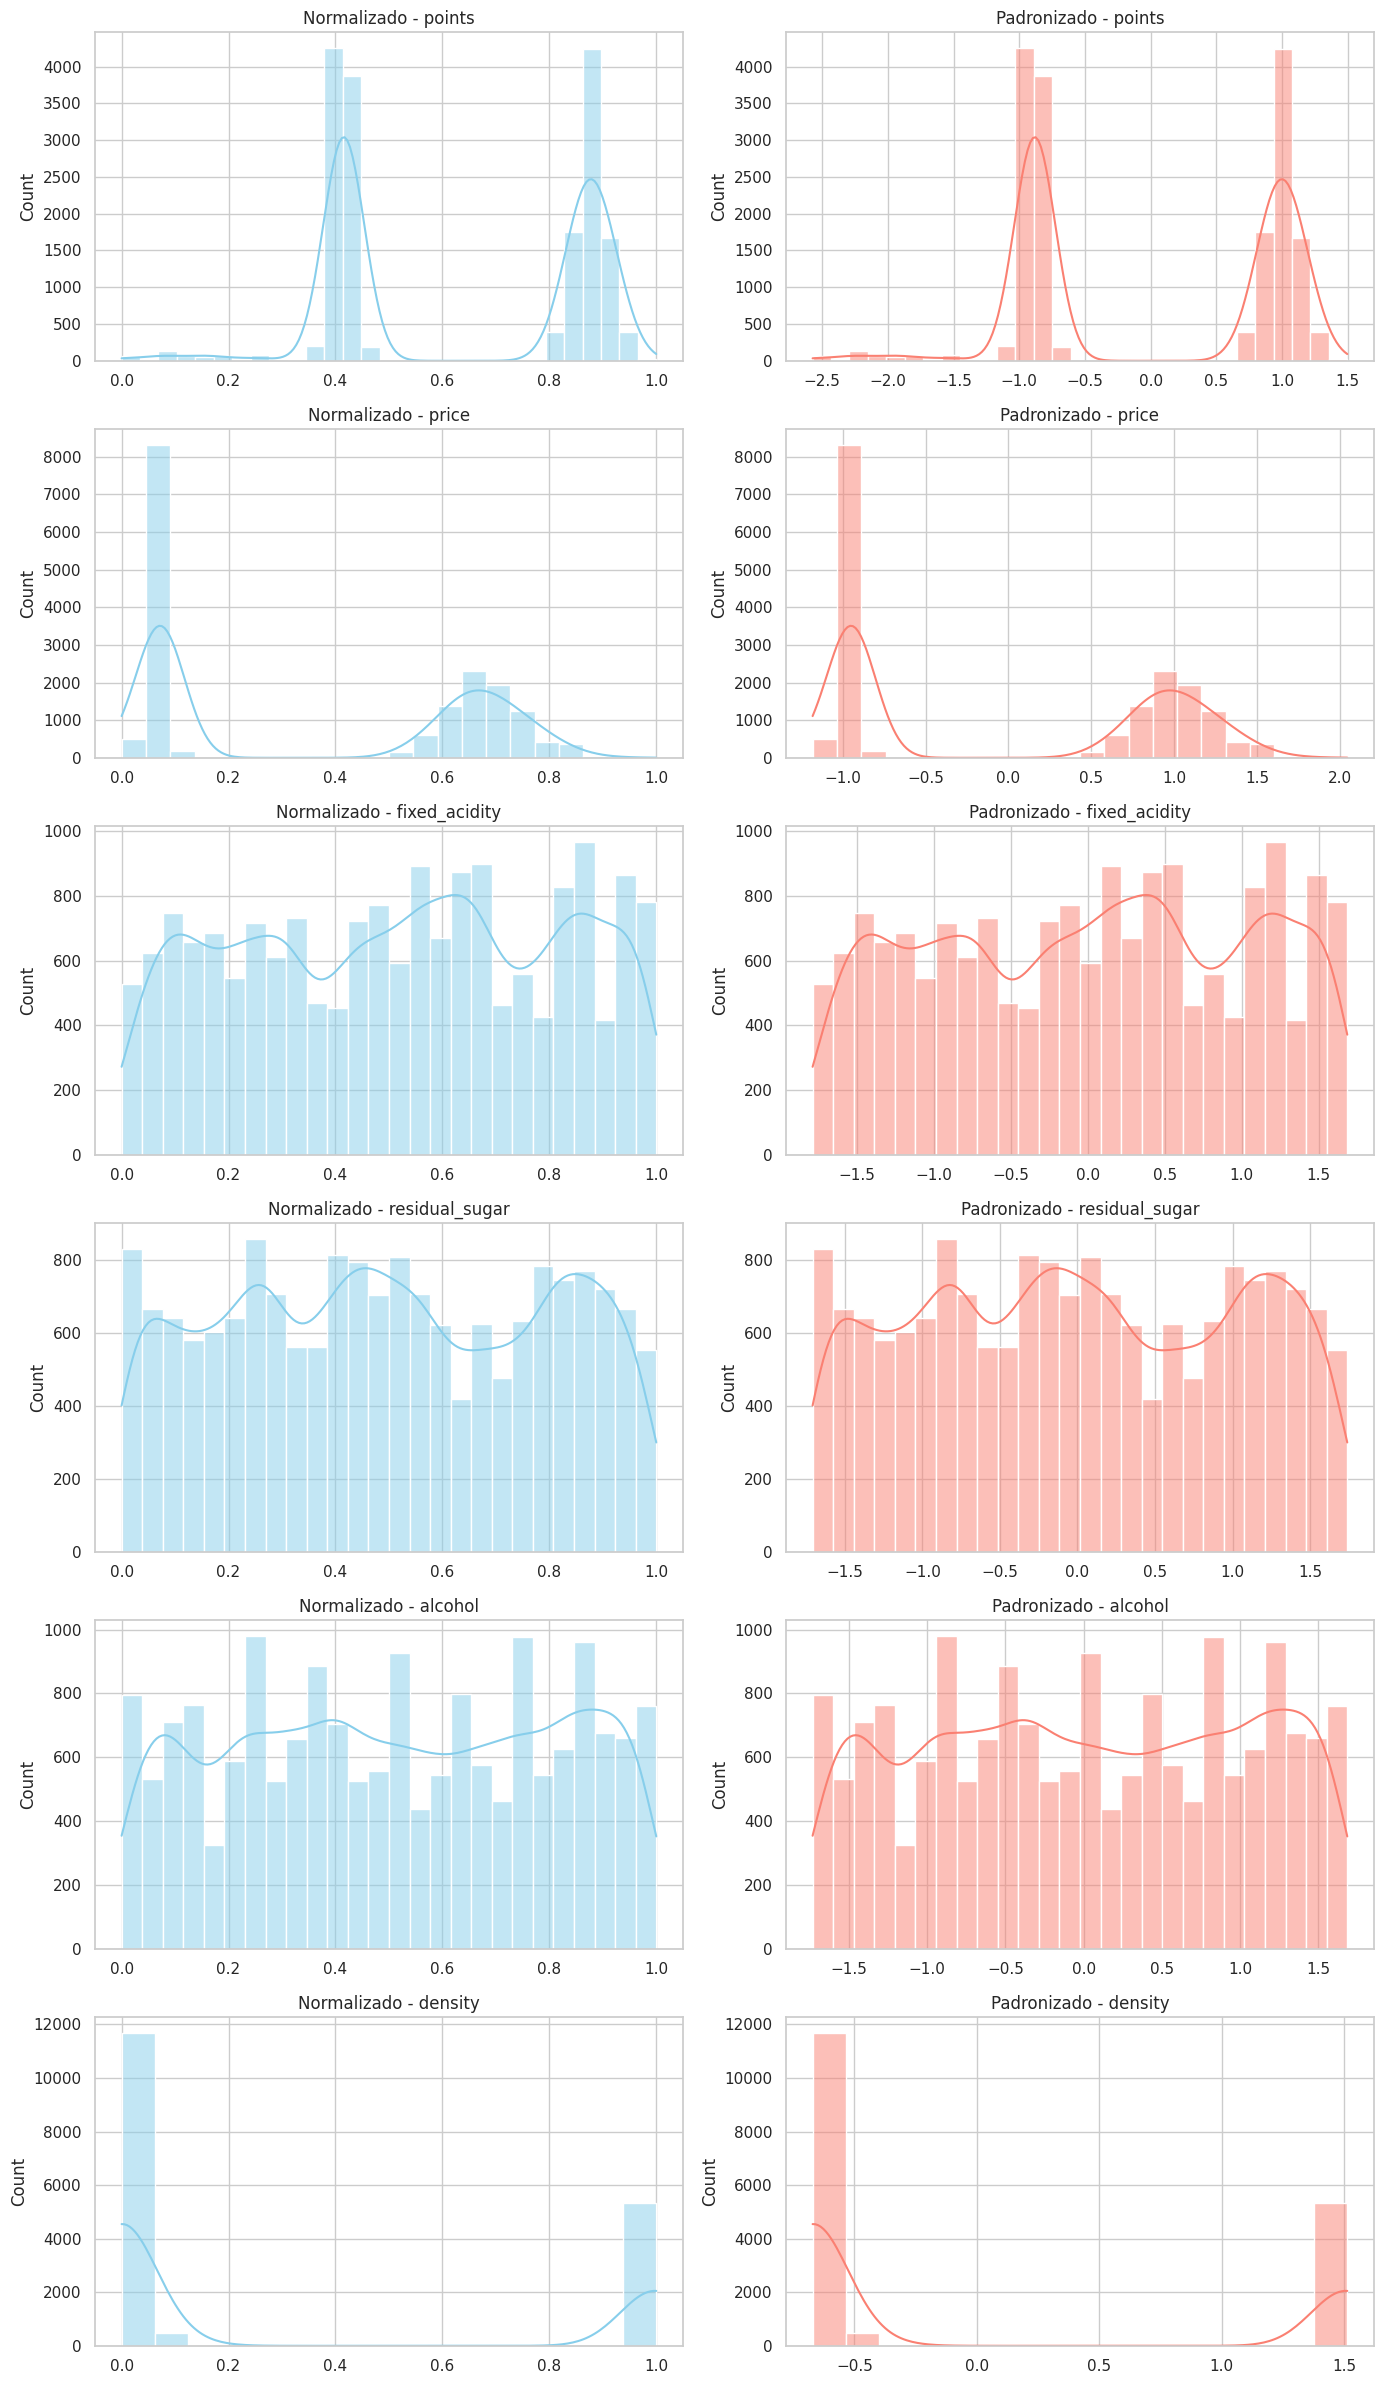

In [67]:
# Lista das colunas
numeric_cols = ['points', 'price', 'fixed_acidity', 'residual_sugar', 'alcohol', 'density']

n_cols = 2
n_rows = len(numeric_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Gráfico da Normalização
    sns.histplot(X_train_normalized_df[col], kde=True, ax=axes[2*i], color='skyblue')
    axes[2*i].set_title(f'Normalizado - {col}')
    axes[2*i].set_xlabel('')

    # Gráfico da Padronização
    sns.histplot(X_train_standardized_df[col], kde=True, ax=axes[2*i+1], color='salmon')
    axes[2*i+1].set_title(f'Padronizado - {col}')
    axes[2*i+1].set_xlabel('')

# Ajuste do layout
plt.tight_layout()
plt.show()

**Conclusão**

A forma da distribuição ficou similar após ambas as transformações indica que os padrões nos dados continuam disponíveis para o modelo.

A padronização manteve a variabilidade em termos estatísticos, o que é bom para o modelo de regressão logística.

A normalização fez um tratamento justo entre as variáveis, o que é indicado para modelos que dependem de distância.

Como pretendemos usar modelos lineares para a classificação, a padronização é mais indicada.

<a id="1"></a>
# <p style="background-color:#3498DB; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#FFF; font-size:160%; text-align:center; border-radius:10px; padding:12px;">6. Conclusão</p>

A análise detalhada e o pré-processamento do conjunto de dados de vinhos foram fundamentais para assegurar a integridade e a qualidade das informações antes da modelagem. Após a limpeza, que incluiu a remoção de registros duplicados, tratamento de valores ausentes e a eliminação de outliers, foi possível focar em variáveis relevantes que representam as propriedades químicas e geográficas dos vinhos.

Para preparar os dados para análises mais eficazes, foram aplicadas transformações como a padronização das variáveis numéricas, que ajuda a equilibrar a escala dos dados, evitando que atributos com valores maiores influenciem desproporcionalmente os modelos. Além disso, a criação de categorias derivadas, como o rótulo de qualidade (quality_label), simplificou a complexidade da variável contínua de pontuação, facilitando a visualização e a segmentação dos vinhos em grupos distintos.

Durante a análise exploratória, técnicas visuais como boxplots, swarmplots e gráficos de dispersão evidenciaram padrões claros, incluindo a correlação positiva entre o teor alcoólico e a qualidade, além da tendência de vinhos de maior qualidade apresentarem preços mais elevados. A segmentação geográfica demonstrou que a origem do vinho é um fator importante na definição da sua qualidade, confirmando o impacto do terroir.

Essas abordagens de pré-processamento e transformação foram essenciais para garantir que os modelos construídos pudessem capturar de forma eficiente as relações presentes nos dados, levando à confirmação das hipóteses iniciais sobre a influência geográfica, a relação entre álcool e qualidade, e a associação entre qualidade e preço.


*****************************************
Todas as hipoteses se confirmaram

1. A qualidade dos vinhos pode ser distinguida com base nas zonas geográficas (país e região)?

>>Sim, a qualidade dos vinhos no dataset apresenta diferenças significativas baseadas nas zonas geográficas, o que indica que características regionais impactam a qualidade. A distribuição das categorias de qualidade (quality_label) varia conforme o país e as regiões de produção (province, region_1).

2. Existe correlação entre qualidade e nível alcoólico?
Analisando a variável alcohol em relação às categorias de qualidade:

>>Sim, há uma correlação positiva moderada entre qualidade e nível alcoólico no dataset, indicando que vinhos mais alcoólicos tendem a ser melhor avaliados. Vinhos classificados como high possuem, em média, teor alcoólico um pouco maior que os vinhos medium e low.


3. A qualidade do vinho quando é alta tende a ter um preço mais elevado?
Com base em gráficos de dispersão e boxplots:

>>Sim, vinhos de alta qualidade no dataset tendem a ter preços mais elevados, confirmando a relação esperada entre qualidade e preço.Vinhos classificados como high possuem preços médios significativamente maiores do que os das categorias medium e low.


